<a id="1"></a>
# <p style="background-color:#26344e;font-family:sans-serif;color:#FFF9ED;font-size:140%;text-align:left;border-radius:8px 8px;">1. Контекст</p>
Мы банк, который имеет базу данных с большим объемом информации о наших клиентах.<br>
Наша цель — помочь аналитикам спрогнозировать уровень оттока этих клиентов, чтобы снизить его.

На основе этого набора данных мы можем получить актуальную информацию, которая может определить долгосрочную перспективу<br>
стабильность счета или его скорый выход.

## 1.1. Видение бизнеса

Цель состоит в том, чтобы проанализировать данные о клиентах банка, чтобы понять причины, которые заставляют клиентов покидать финансовое учреждение, и, следовательно, искать решения, позволяющие избежать этого. Важность предотвращения оттока клиентов заключается в поддержании прочной базы лояльных клиентов, что крайне важно для долгосрочного роста и прибыльности банка. * **Определение цели**. Помогите аналитикам спрогнозировать уровень оттока клиентов, чтобы снизить его.


## 1.2. Аналитический подход
**Техническое определение цели**: создать модель прогнозной классификации для классификации данных из файла тестирования.<br> Мы обучаем модель с помощью обучающих данных и стремимся максимизировать показатель F1 (макро).

## 1.3 Данные

| Столбец                   | Описание                                            |
|---------------------------|-----------------------------------------------------|
| CLIENTNUM                 | Уникальный идентификатор клиента (Целое число)     |
| Attrition_Flag            | Индикатор ухода клиента (ушел или остался) (Булев тип) |
| Customer_Age              | Возраст клиента (Целое число)                       |
| Gender                    | Пол клиента (Строка)                               |
| Dependent_count           | Количество иждивенцев у клиента (Целое число)      |
| Education_Level           | Уровень образования клиента (Строка)               |
| Marital_Status            | Семейное положение клиента (Строка)                |
| Income_Category           | Категория дохода клиента (Строка)                  |
| Card_Category             | Тип карты клиента (Строка)                         |
| Months_on_book            | Время, в течение которого клиент обслуживается в банке (Целое число) |
| Total_Relationship_Count  | Общее количество продуктов/услуг банка, которыми пользуется клиент (Целое число) |
| Months_Inactive_12_mon    | Количество месяцев за последний год, когда клиент был неактивен (Целое число) |
| Contacts_Count_12_mon     | Количество контактов с клиентом за последние 12 месяцев (Целое число) |
| Credit_Limit              | Кредитный лимит клиента (Целое число)              |
| Total_Revolving_Bal       | Общий револьверный баланс (остаток задолженности) клиента (Целое число) |
| Avg_Open_To_Buy           | Средний доступный лимит для заимствования (Целое число) |
| Total_Amt_Chng_Q4_Q1      | Изменение общей суммы транзакций между 4-м и 1-м кварталом (Целое число) |
| Total_Trans_Amt           | Общая сумма транзакций (Целое число)               |
| Total_Trans_Ct            | Общее количество транзакций (Целое число)          |
| Total_Ct_Chng_Q4_Q1       | Изменение общего количества транзакций между 4-м и 1-м кварталом (Целое число) |
| Avg_Utilization_Ratio     | Средний коэффициент использования кредитного лимита (Целое число) |


## 1.4 Настройка среды

**Загрузка библиотеки**

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from  scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # Важно использовать Pipeline для корректного применения SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
import optuna
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from  scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap
import xgboost as xgb
import catboost as cb
import optuna
from sklearn.inspection import permutation_importance
import scipy.stats as stats
import json
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Suppress warnings**

In [62]:
warnings.filterwarnings('ignore')

**Display options**

In [63]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

<a id="2"></a>
# <p style="background-color:#26344e;font-family:sans-serif;color:#FFF9ED;font-size:140%;text-align:left;border-radius:8px 8px;">2. Загрузка данных</p>

In [64]:
path_test = 'data/supply_chain_test.csv'
path_train = 'data/supply_chain_train.csv'

train = pd.read_csv(path_train)
test = pd.read_csv(path_test)
train.head()


,train_idx,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,0,713071383,54,F,1,Unknown,Single,Unknown,Blue,36,1,3,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,1,714246333,58,F,4,High School,Married,Unknown,Blue,48,1,4,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,2,718206783,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,1,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,3,721096983,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,3,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,4,720028683,49,F,2,High School,Married,$40K - $60K,Blue,39,5,3,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1


In [65]:
def simple_translate(df):
    """Перевод английских категорий на русский"""
    
    # Образование
    education_map = {
        'Unknown': 'Неизвестно',
        'Uneducated': 'Необразованный',
        'High School': 'Средняя школа', 
        'College': 'Колледж',
        'Graduate': 'Выпускник',
        'Post-Graduate': 'Аспирант',
        'Doctorate': 'Доктор наук'
    }
    
    # Семейное положение  
    marital_map = {
        'Unknown': 'Неизвестно',
        'Single': 'Холост',
        'Married': 'Женат',
        'Divorced': 'Разведен'
    }
    
    # Доход (конвертация в рубли)
    income_map = {
        'Unknown': 'Неизвестно',
        'Less than $40K': 'Менее 4 млн.₽',
        '$40K - $60K': '4-6 млн.₽',
        '$60K - $80K': '6-8 млн.₽',
        '$80K - $120K': '8-12 млн.₽', 
        '$120K +': 'Более 12 млн.₽'
    }
    
    if 'Education_Level' in df.columns:
        df['Education_Level'] = df['Education_Level'].map(education_map)
        # Заполняем возможные пропуски исходными значениями
        df['Education_Level'] = df['Education_Level'].fillna(df['Education_Level'])
        
    if 'Marital_Status' in df.columns:
        df['Marital_Status'] = df['Marital_Status'].map(marital_map)
        df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'])
        
    if 'Income_Category' in df.columns:
        df['Income_Category'] = df['Income_Category'].map(income_map)
        df['Income_Category'] = df['Income_Category'].fillna(df['Income_Category'])
    
    return df

# Применяем
print("🔄 Перевод английских категорий на русский...")
train = simple_translate(train)
test = simple_translate(test)


🔄 Перевод английских категорий на русский...


In [66]:
train

,train_idx,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,0,713071383,54,F,1,Неизвестно,Холост,Неизвестно,Blue,36,1,3,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,1,714246333,58,F,4,Средняя школа,Женат,Неизвестно,Blue,48,1,4,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,2,718206783,45,F,4,Неизвестно,Холост,Менее 4 млн.₽,Gold,36,6,1,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,3,721096983,34,F,2,Выпускник,Холост,Менее 4 млн.₽,Blue,36,4,3,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,4,720028683,49,F,2,Средняя школа,Женат,4-6 млн.₽,Blue,39,5,3,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,8096,769053033,44,F,1,Выпускник,Холост,4-6 млн.₽,Blue,38,3,2,5,4142.0,2517,1625.0,0.809,2104,44,0.833,0.608,0
8097,8097,714406158,53,F,3,Средняя школа,Разведен,Неизвестно,Blue,36,4,3,6,7939.0,0,7939.0,0.551,2269,42,0.312,0.000,0
8098,8098,714140133,42,F,4,Выпускник,Неизвестно,Менее 4 млн.₽,Blue,32,3,1,2,2314.0,1547,767.0,0.804,4678,74,1.000,0.669,1
8099,8099,720244983,40,M,3,Неизвестно,Холост,4-6 млн.₽,Blue,28,4,1,1,3563.0,1707,1856.0,0.506,1482,42,0.312,0.479,1


* Мы можем исключить переменные `train_idx` и `CLIENTNUM`, поскольку они не предоставляют нам соответствующей информации, позволяющей сделать прогноз.

**Размеры данных:**

In [67]:
print(f'Shape of train dataset: {train.shape}')
print(f'Shape of test dataset: {test.shape}')

Shape of train dataset: (8101, 22)
Shape of test dataset: (2026, 21)


Изучение данных и их полноты

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   train_idx                 8101 non-null   int64  
 1   CLIENTNUM                 8101 non-null   int64  
 2   Customer_Age              8101 non-null   int64  
 3   Gender                    8101 non-null   object 
 4   Dependent_count           8101 non-null   int64  
 5   Education_Level           8101 non-null   object 
 6   Marital_Status            8101 non-null   object 
 7   Income_Category           8101 non-null   object 
 8   Card_Category             8101 non-null   object 
 9   Months_on_book            8101 non-null   int64  
 10  Total_Relationship_Count  8101 non-null   int64  
 11  Months_Inactive_12_mon    8101 non-null   int64  
 12  Contacts_Count_12_mon     8101 non-null   int64  
 13  Credit_Limit              8101 non-null   float64
 14  Total_Re

<div class="alert alert-info" role= "alert"> <span style='font-family:sans-serif'> <b>Инсайт: </b><br> <ul> <li>Большинство из них (15 из 20) представляют собой числовые данные.</li> <li>Нет пропущенных значений ни в одном из столбцов (по крайней мере, ни один из них не может быть легко обнаружен пандами).</li> <li>На первый взгляд, все типы данных кажется, соответствует информации, содержащейся в столбце,<br>хотя я предпочитаю использовать Dependent_count и Attrition_Flag в качестве категориальных переменных.</li> </span> </div>

**Наличие дублей**

In [69]:
train[train.duplicated()]

,train_idx,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag


**Уникальность данных в столбцах**

In [70]:
train.nunique()

train_idx                   8101
CLIENTNUM                   8101
Customer_Age                  44
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                5325
Total_Revolving_Bal         1883
Avg_Open_To_Buy             5757
Total_Amt_Chng_Q4_Q1        1089
Total_Trans_Amt             4462
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          795
Avg_Utilization_Ratio        943
Attrition_Flag                 2
dtype: int64

In [ ]:
#Конвертация денежных значений из долларов в рубли (курс 1:100)
def convert_currency(df):
    """Конвертирует денежные столбцы из долларов в рубли по курсу 1:100"""
    currency_columns = [
        'Credit_Limit',
        'Total_Revolving_Bal', 
        'Avg_Open_To_Buy',
        'Total_Trans_Amt'
    ]
    
    for col in currency_columns:
        if col in df.columns:
            # Просто умножаем на 1, фактически оставляя значения без изменения
            # но логически это теперь рубли вместо долларов
            df[col] = df[col] * 100
    
    return df

# Применяем ко всем датасетам
train = convert_currency(train)
test = convert_currency(test)

## 2.1 Изучение недостающих данных
**Есть ли пропущенные значения, которые пандам нелегко обнаружить?**

In [72]:
train[train.isin(['-','--','na','.','nan','unknown','ukn','Unknown'])].count().sort_values(ascending=False)

train_idx                   0
CLIENTNUM                   0
Avg_Utilization_Ratio       0
Total_Ct_Chng_Q4_Q1         0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Months_Inactive_12_mon      0
Total_Relationship_Count    0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Customer_Age                0
Attrition_Flag              0
dtype: int64

* У нас есть три столбца категориальных переменных с некоторыми записями, в которых встречаются некоторые из вышеуказанных значений.

In [73]:
train[train.isin(['Unknown'])].count().sort_values(ascending=False)[:3]

train_idx                0
CLIENTNUM                0
Avg_Utilization_Ratio    0
dtype: int64

**Данные отсутствуют по случайным причинам или существуют причины такого отсутствия?** Вот некоторые из причин, по которым такие данные могут быть неизвестны:
1. Связанные с конфиденциальностью: возможно, у банка нет явного согласия клиента на сбор и использование таких данных, и они могут не быть включены в базу данных.
2. Что касается проверки: клиенты могут не предоставлять полную или точную информацию о своем уровне образования, семейном положении или доходе, что затрудняет проверку.
3. Изменение обстоятельств: Информация о клиенте может меняться со временем. Например, клиент, который был женат на момент открытия своего банковского счета,возможно, развелся и не обновил свое семейное положение в записях банка.

In [74]:
# Дозаполнение категорий
for ukn in ['Education_Level','Income_Category','Marital_Status']:
  print(train[ukn].value_counts(dropna=False, normalize=True),'\n')

Education_Level
Выпускник         0.312060
Средняя школа     0.199852
Неизвестно        0.148747
Необразованный    0.144550
Колледж           0.100728
Аспирант          0.050241
Доктор наук       0.043822
Name: proportion, dtype: float64 

Income_Category
Менее 4 млн.₽     0.347118
4-6 млн.₽         0.179361
8-12 млн.₽        0.152697
6-8 млн.₽         0.138501
Неизвестно        0.109740
Более 12 млн.₽    0.072584
Name: proportion, dtype: float64 

Marital_Status
Женат         0.465004
Холост        0.388100
Разведен      0.075423
Неизвестно    0.071473
Name: proportion, dtype: float64 



**Гипотеза:** Одна деталь, которую следует принять во внимание, заключается в том, что не существует ни одного клиента с семейным положением «вдовец», что могло бы дать нам пищу для размышлений, мы можем легко выяснить, связано ли это как-то с незнанием этих данных; рассмотрение возрастного распределения людей с неизвестным семейным положением, поскольку можно было бы ожидать, что подавляющее большинство будут людьми преклонного возраста.

In [75]:
train.groupby('Marital_Status')['Customer_Age'].describe().style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Женат,3767.000000,46.735068,7.747982,26.000000,41.000000,47.000000,52.000000,70.000000
Неизвестно,579.000000,45.530225,6.809598,26.000000,42.000000,45.000000,49.000000,65.000000
Разведен,611.000000,44.896890,7.638396,26.000000,40.000000,45.000000,49.000000,65.000000
Холост,3144.000000,46.209606,8.565015,26.000000,40.000000,46.000000,52.000000,65.000000


Мы можем опровергнуть эту гипотезу, так как видим, что 75% клиентов - 49 лет и младше, и это не меняется по отношению к остальным группам.

Гипотеза: возможно, некоторые люди предпочитают сохранять конфиденциальность некоторых фрагментов информации о себе, и в этом случае у нас будет более одного неизвестного фрагмента информации об этом клиенте. Для скольких клиентов у нас есть более одной неизвестной информации?


In [76]:
ukn_3 = len(train[(train.Marital_Status == 'Unknown') & (train.Income_Category == 'Unknown') & (train.Education_Level == 'Unknown')])
ukn_2 = np.sum([len(train[(train.Marital_Status == 'Unknown') & (train.Income_Category == 'Unknown')]),
               len(train[(train.Marital_Status == 'Unknown') & (train.Education_Level == 'Unknown')]),
               len(train[(train.Income_Category == 'Unknown') & (train.Education_Level == 'Unknown')])])
ukn_1 = len(train[(train.Marital_Status == 'Unknown') | (train.Income_Category == 'Unknown') | (train.Education_Level == 'Unknown')])

print(f"Records without the 3 missing values: {ukn_3}")
print(f"Records without 2 out of 3 missing values: {ukn_2}")
print(f"Records without 1 out of 3 missing values : {ukn_1}")

Records without the 3 missing values: 0
Records without 2 out of 3 missing values: 0
Records without 1 out of 3 missing values : 0


Мы видим, что доля клиентов, у которых есть только одни неизвестные данные, значительно выше по сравнению с теми, у кого отсутствуют 2
 и значительно выше по отношению к тем, у кого неизвестны все 3 данных. Это указывает на то, что наша гипотеза, вероятно, неверна.

<div class="alert alert-warning" role= "alert"> <span style='font-family:sans-serif'> <b>Обрабатывать записи с тремя пропущенными значениями </b><br> <ul> <li>Что мы можем сделать, так это исключить записи, в которых три данных неизвестны, поскольку их очень мало, и у нас очень<br> мало информации о них.</li> </span> </div>

In [77]:
def drop_rows_cols(df):
  df.columns = df.columns.str.replace('train_idx', 'idx')
  df.columns = df.columns.str.replace('test_idx', 'idx')
  df.drop(['idx','CLIENTNUM'], axis=1, inplace=True)
  df.drop(df[(df['Marital_Status'] == 'Unknown') & (df['Income_Category'] == 'Unknown') & (df['Education_Level'] == 'Unknown')]\
          .index, axis=0, inplace=True)
  return df

train = drop_rows_cols(train)

**Есть ли в пропущенных значениях какая-либо закономерность, которая могла бы объяснить причину их отсутствия?**

Категория дохода

In [78]:
group = pd.DataFrame([train.loc[train.Income_Category == 'Unknown','Gender'].value_counts(normalize=True),
                        train['Gender'].value_counts(normalize=True)],
                        index= ['uknown','all']).transpose()
group

,uknown,all
Gender,,
F,NaN,0.528206
M,NaN,0.471794


**Какова может быть причина такого поведения?**

In [79]:
train.groupby('Gender')['Income_Category'].value_counts().unstack()

Income_Category,4-6 млн.₽,6-8 млн.₽,8-12 млн.₽,Более 12 млн.₽,Менее 4 млн.₽,Неизвестно
Gender,,,,,,
F,832.0,NaN,NaN,NaN,2595.0,852.0
M,621.0,1122.0,1237.0,588.0,217.0,37.0


<div class="alert alert-info" role= "alert"> <span style='font-family:sans-serif'> <b>Инсайт: </b><br> <ul> <li>Мы можем наблюдать значительную разницу между группой людей, чья категория дохода неизвестна, и теми, чья категория дохода известна. В исходном наборе данных доля мужчин и женщин была близка к 50%; однако, стратифицируя  население по отсутствию записей об их уровне дохода, мы можем заметить, что около 95% отсутствующих записей принадлежат  женщинам и только 5% - мужчинам.</li><br> <li>Это указывает на то, что отсутствие данных в «категории дохода» вызвано не случайной причиной, а проблемой конфиденциальности, в которой именно клиент предпочитает не предоставлять такую информацию, а женщины с гораздо меньшей вероятностью предоставляют данные, их уровень дохода.</li><br> <li>Из набора данных мы видим, что женщины обычно зарабатывают меньше, чем мужчины, что может объяснить, почему они с большей вероятностью скрывают данные о своем доходе.</li> </span> </div>

<div class="alert alert-warning" role="alert"> <span style='font-family:sans-serif'> <b>Какие типы пропущенных значений у нас есть? </b><br> <ul> <li>Отсутствие данных как об «Уровне образования», так и о «Семейном положении» человека, по-видимому, не зависит как от наблюдаемых, так и от ненаблюдаемых переменных и происходит совершенно случайно (MCAR).</li><br> <li>Отсутствие данных в «Категории дохода», по-видимому, обусловлено наблюдаемыми значениями. (Март).</li><br> <b>Как мы с ними справимся? </b><br><br> <ul> <li>Мы будем относиться к Неизвестным категориям именно так, как к другой категории.</li> </span> </div>

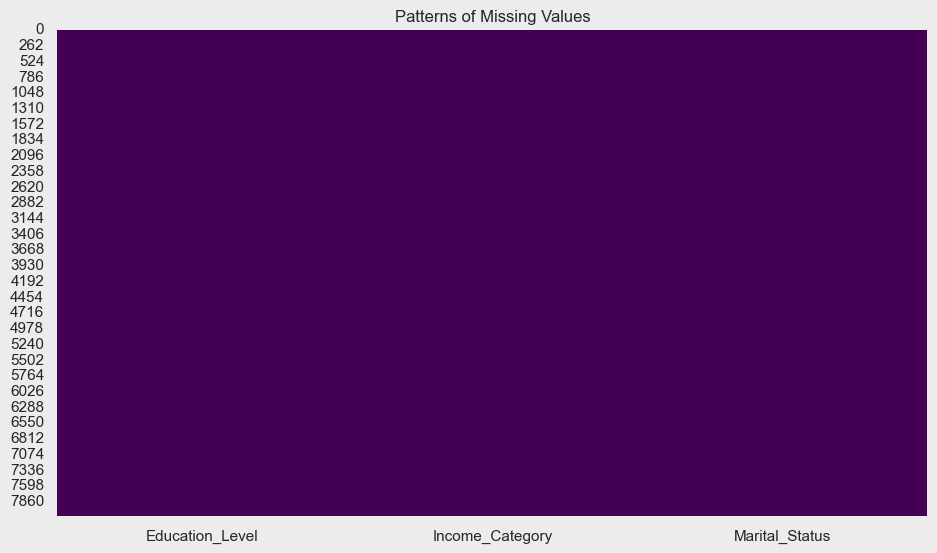

Correlation between missing patterns:
                 Education_Level  Income_Category  Marital_Status
Education_Level              NaN              NaN             NaN
Income_Category              NaN              NaN             NaN
Marital_Status               NaN              NaN             NaN


In [80]:
# Детальный анализ пропусков
def analyze_missing_patterns(df):
    """Углубленный анализ паттернов пропущенных значений"""
    
    # Матрица пропусков
    missing_matrix = df[['Education_Level', 'Income_Category', 'Marital_Status']].isin(['Unknown'])
    
    # Визуализация паттернов пропусков
    plt.figure(figsize=(10, 6))
    sns.heatmap(missing_matrix.astype(int), cbar=False, cmap='viridis')
    plt.title('Patterns of Missing Values')
    plt.show()
    
    # Анализ взаимосвязей между пропусками
    missing_corr = missing_matrix.corr()
    print("Correlation between missing patterns:")
    print(missing_corr)
    
    return missing_matrix


missing_patterns = analyze_missing_patterns(train)

<a id="3"></a>
# <p style="background-color:#26344e;font-family:sans-serif;color:#FFF9ED;font-size:140%;text-align:left;border-radius:8px 8px;">3. Исследовательский анализ данных</p>

**Копия набора данных и параметры визуализации**

In [81]:
train_eda = train.copy()
plt.style.use('fivethirtyeight')
sns.set(rc={'axes.facecolor':'#DCDCDC','figure.facecolor':'#ECECEC','axes.grid':False})
sns.set_palette('mako_r')

**Перво-наперво**. Давайте посмотрим, какое поведение имеет целевая переменная Attrition_Flag.

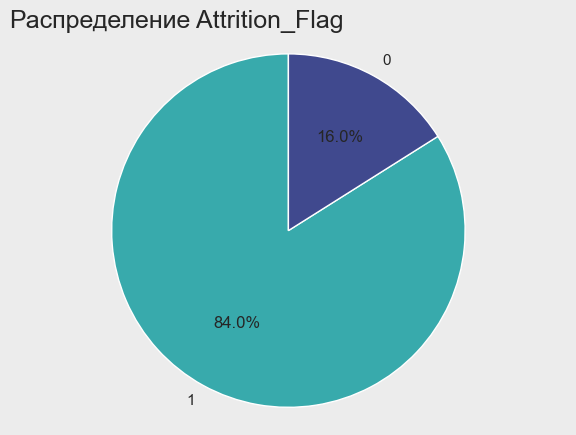

In [82]:
attrition_counts = train_eda['Attrition_Flag'].value_counts()

fig, ax = plt.subplots()
ax.pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%',
       startangle=90, colors=sns.color_palette('mako_r',2))
ax.axis('equal')
plt.title('Распределение Attrition_Flag', size=18, loc='left')
plt.show()


**Очевидно, что набор данных несбалансирован: процент единиц «1» гораздо выше, чем «0».**

## 3.1 Изучение категориальных столбцов

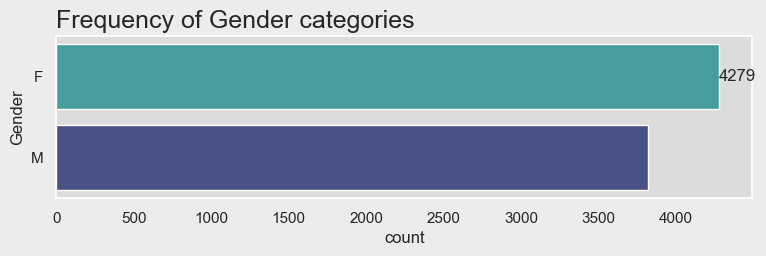

In [83]:
fig, ax  = plt.subplots(figsize=(8,2))
ax=sns.countplot(y='Gender', data=train_eda, palette='mako_r',
				order = train_eda['Gender'].value_counts(normalize=True).index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
ax.set_title(f'Frequency of Gender categories', size=18, loc='left')
plt.show()

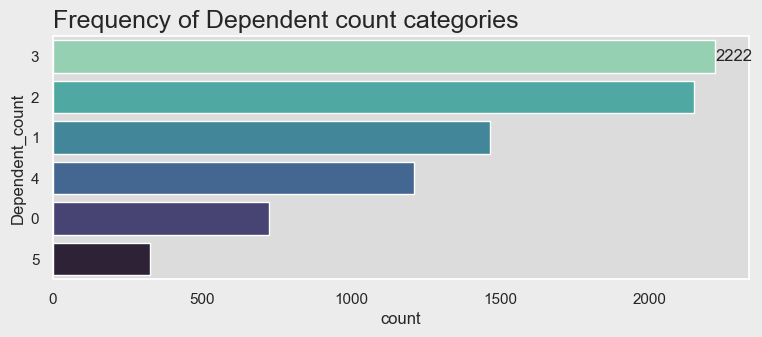

In [84]:
fig, ax  = plt.subplots(figsize=(8,3))
ax=sns.countplot(y='Dependent_count', data=train_eda, palette='mako_r',
				order = train_eda['Dependent_count'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
ax.set_title(f'Frequency of Dependent count categories', size=18, loc='left')
plt.show()

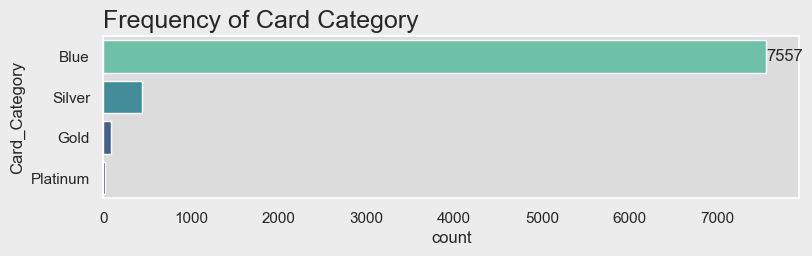

In [85]:
fig, ax  = plt.subplots(figsize=(8,2))
ax=sns.countplot(y='Card_Category', data=train_eda, palette='mako_r',
				order = train_eda['Card_Category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
ax.set_title(f'Frequency of Card Category', size=18, loc='left')
plt.show()

<div class="alert alert-info" role= "alert"> <span style='font-family:sans-serif'> <b>Информация: </b><br> <ul> <li>У нас почти равномерное распределение женщин и мужчин в наборе данных.</li> <li>Почти все клиенты в базе данных имеют детей в своих семьях.</li> <li>Подавляющее большинство клиентов имеют синюю карту, что имеет смысл, поскольку другие карты обычно зарезервированы для особых клиентов, поэтому они будут у немногих из них.</li> </span> </div>

## 3.2 Изучите числовые столбцы

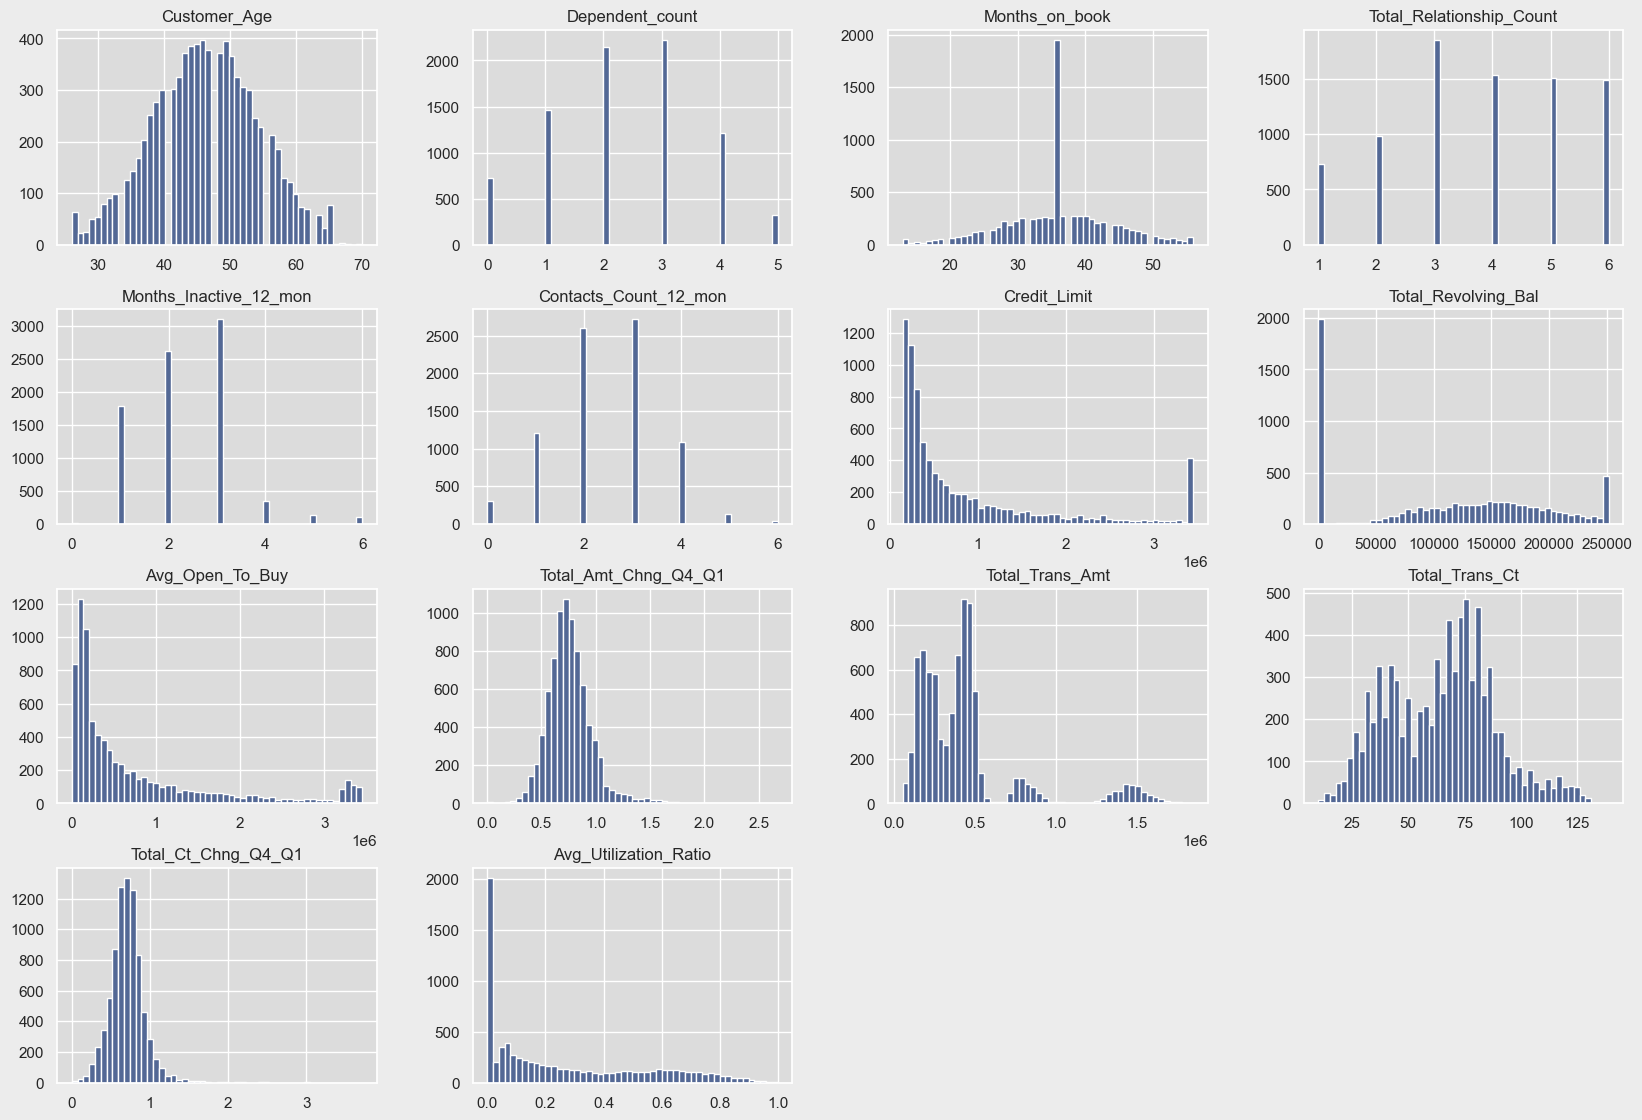

In [86]:
train_eda.select_dtypes('number').drop('Attrition_Flag', axis=1).hist(figsize=(18,13), bins=50,
                                                                      color='#536895')
plt.show()

<div class="alert alert-info" role= "alert"> <span style='font-family:sans-serif'> <b>Аналитика: </b><br> <ul> <li><b>Months_on_book.</b> Существует значительно большое количество записей со сроком владения 36 месяцев.</li><br> <li><b>Months_Inactive_12_mon.</b> Очень немногие клиенты имеют были неактивны в течение 4 или более месяцев (также очень немногие пользователи неактивны в течение 0 месяцев, но отсутствие активности в течение 100 % месяцев — это нормально).</li><br> <li><b>Contacts_Count_12_mon. </b> Очень мало клиентов с более чем 4 контактами с банком, так же как очень мало с 0 контактами.</li><br> <li><b>Credit_Limit. Это распределение с длинным хвостом, что вполне разумно, поскольку меньше людей имеют доступ к более высоким кредитным лимитам. Резкое увеличение ближе к концу может быть связано с лимитом банка, который представляет всех клиентов, которые достигли этого лимита.</li><br> <li><b>Total_Revolving_Bal</b> Большинство клиентов не имеют непогашенного остатка. Еще одна деталь: несмотря на наличие клиентов с высокими кредитными лимитами, ни у одного из них баланс не превышает 2517. В этот момент может существовать ограничение, объясняющее резкое увеличение.</li><br> <li><b>Avg_Open_To_Buy.</b> Значения в этом столбце являются результатом вычитания общего баланса счета из кредитного лимита.<br> Поэтому, учитывая наличие клиентов с нетипичными кредитными лимитами, вполне нормально видеть подобное число. клиентов с нетипичными значениями здесь.</li><br> <li><b>Total_Trans_Amt.</b> У некоторых клиентов очень высокие суммы транзакций</li><br> <li><b>Total_Amt_Chng_Q4_Q1 и Total_Ct_Chng_Q4_Q1.</b> Доля клиентов с нетипичными значениями в сумме, изменившейся с 4-го квартала на 1-й квартал, практически такая же, как и в считать. Вероятно, это одни и те же записи.</li><br> <li><b>Avg_Utilization_Ratio.</b> Этот показатель основан на возобновляемом балансе, разделенном на кредитный лимит. С помощью пояснений, данных выше относительно двух других переменных, можно понять его поведение.</li> </span> </div>

## 3.3 Многомерный анализ

### 3.3.1 Категориальная переменная и цель
**Существуют ли существенные различия в характеристиках между клиентами, покинувшими банк, и теми, кто этого не сделал?**

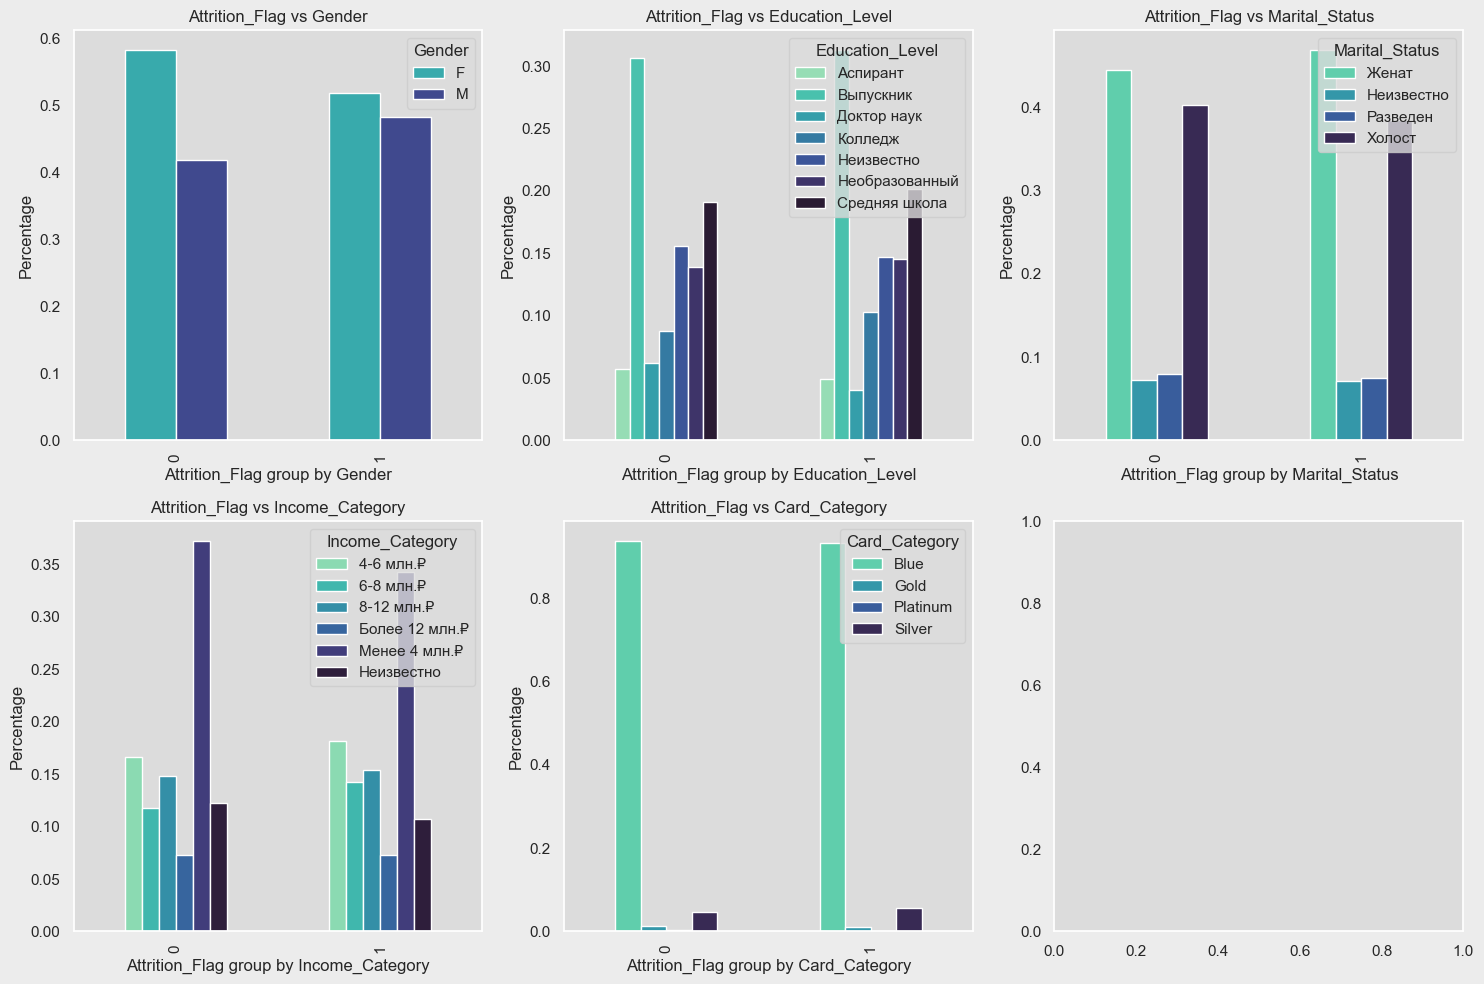

In [87]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

categorical_features = train.select_dtypes('object')
def groupby_categorical(feature):
  group = train.groupby('Attrition_Flag')[feature].value_counts(normalize=True)
  return group.unstack()

for i, feature in enumerate(categorical_features):
    if i < 5:
        row, col = i // 3, i % 3
        group = groupby_categorical(feature)
        ax = axes[row, col]
        group.plot(kind='bar', color=sns.color_palette('mako_r',len(group.columns)), xlabel=f'Attrition_Flag group by {feature}', ax=ax)
        ax.set_ylabel('Percentage')
        ax.set_title(f'Attrition_Flag vs {feature}')

plt.tight_layout()
plt.show()

<div class="alert alert-info" role= "alert"> <span style='font-family:sans-serif'> <b>Инсайт: </b><br> <ul> Я не вижу какой-либо характеристики, которая была бы значительно более распространенной в одной группе по сравнению с другой.<br> Поэтому на данный момент у меня нет достаточных доказательств, чтобы заключить, что категориальные переменные, большинство из которых являются демографическими по своей природе, могут быть потенциальными. предсказатели того, покинет ли клиент заведение. </span> </div>

**Могу ли я определить, какие категориальные переменные более статистически связаны с целевой переменной?** Мы можем создать таблицу сопряженности для каждого категориального столбца рядом с целевой переменной `Attrition_Flag`,<br>, а затем применить критерий хи-квадрат для наблюдения за значением p.

**Наши гипотезы заключаются в следующем:**
 **H0:** Между категориальными переменными и целевой переменной нет существенной связи, а это означает, что<br> категориальные переменные не влияют на вероятность того, что целевая переменная будет равна 0 или 1. * **H1:** Существует значительная связь между категориальными переменными и целевой переменной, что позволяет предположить, что<br> категориальные переменные действительно влияют на вероятность того, что целевая переменная будет равна 0 или 1.

In [88]:
for catcol in train_eda.select_dtypes('object'):
  gdf = train_eda.groupby('Attrition_Flag')[catcol].value_counts().unstack().values
  res = chi2_contingency(gdf)
  print(f'category: {catcol}, statistic: {res.statistic:.4f}, pvalue: {res.pvalue:.4f}')

category: Gender, statistic: 17.9297, pvalue: 0.0000
category: Education_Level, statistic: 17.7085, pvalue: 0.0070
category: Marital_Status, statistic: 2.6328, pvalue: 0.4518
category: Income_Category, statistic: 11.5938, pvalue: 0.0408
category: Card_Category, statistic: 5.1494, pvalue: 0.1612


<div class="alert alert-warning" role= "alert"> <span style='font-family:sans-serif'> <b>Значимые переменные: </b><br> <ul> <li> <b>Пол < 0,0000</b></li> <li> <b>Уровень образования = 0,007</b></li> <li> <b>Income_Category = 0,04</b></li><br> Если значение p меньше 0,05, это предполагает значительную связь между этими категориальными переменными<br> и целевой переменной. Другими словами, категориальные переменные действительно влияют на вероятность того, что целевая<br> переменная будет равна 0 или 1. Следовательно, мы можем отклонить нулевую гипотезу для этих категорий и принять<br> альтернативную гипотезу.<br><br> <b>Мы учтем эту информацию на последующих этапах построения модели прогнозирования.</b> </span> </div>

### 3.3.2 Числовые переменные и цель
**Какая информация о клиенте больше всего коррелирует с уровнем отказов?**

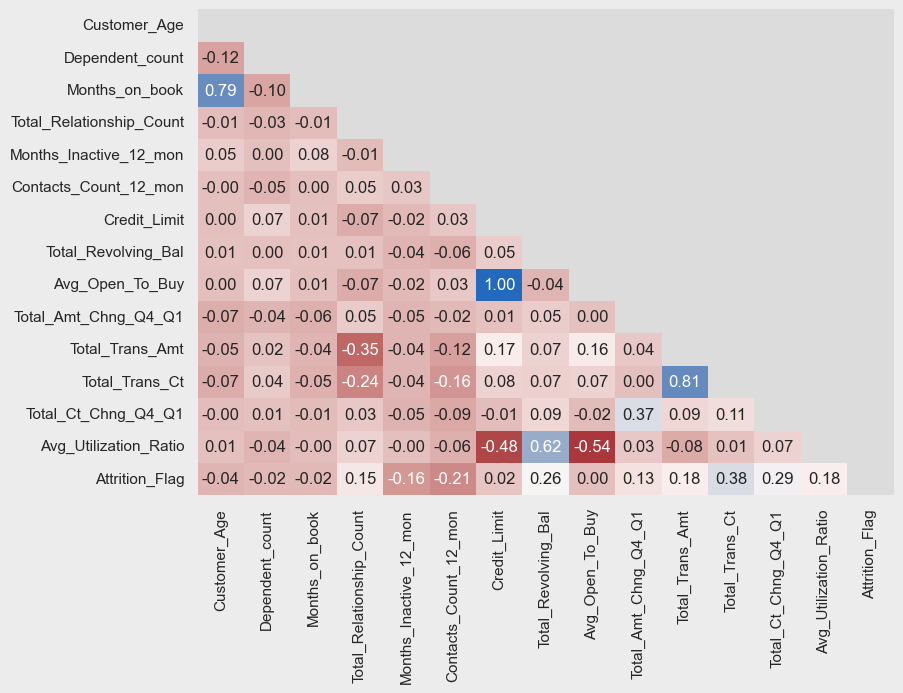

In [89]:
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(train_eda.select_dtypes('number').corr(), dtype=bool))
sns.heatmap(train_eda.select_dtypes('number').corr(), annot=True, cmap='vlag_r', fmt='.2f', cbar=False, mask=mask)
plt.show()

<div class="alert alert-info" role= "alert"> <span style='font-family:sans-serif'> <b>Интересные данные: </b><br> <ul> <li>Мы наблюдаем высокую корреляцию между переменными <b>Total_Revolving_Bal и Avg_Utilization_Ratio</b>.<br> Эта корреляция логична, поскольку расчет коэффициента использования включает оборотный баланс в качестве числитель.</li><br> <li>Аналогичный сценарий возникает с <b>Credit_Limit & Avg_Open_To_Buy</b>, но в этом случае кредитный лимит действует как вычтенное значение в формуле.</li><br> <li><b>Total_Trans_Amt и Total_Trans_Ct</b> демонстрируют сильную корреляцию. Это можно объяснить тем фактом, что при большем количестве транзакций ожидается, что общая сумма транзакций также будет выше.</li><br> <li>Также существует заметная корреляция между переменными <b>Customer_Age и Months_on_Book</b>. Однако в данном случае я не смог выявить четкую причинно-следственную связь.</li><br> Мы осознаем важность тщательного выбора соответствующих переменных, чтобы избежать негативных последствий, таких как переобучение и низкая производительность на новых данных. Тем не менее, иногда наличие большего количества переменных в модели классификации может дать такие преимущества, как возможность выявлять сложные закономерности, уменьшение систематической ошибки и повышение гибкости. В данном случае при тестировании обоих подходов тестовый набор дал лучшие результаты при включении большего количества переменных. </div>

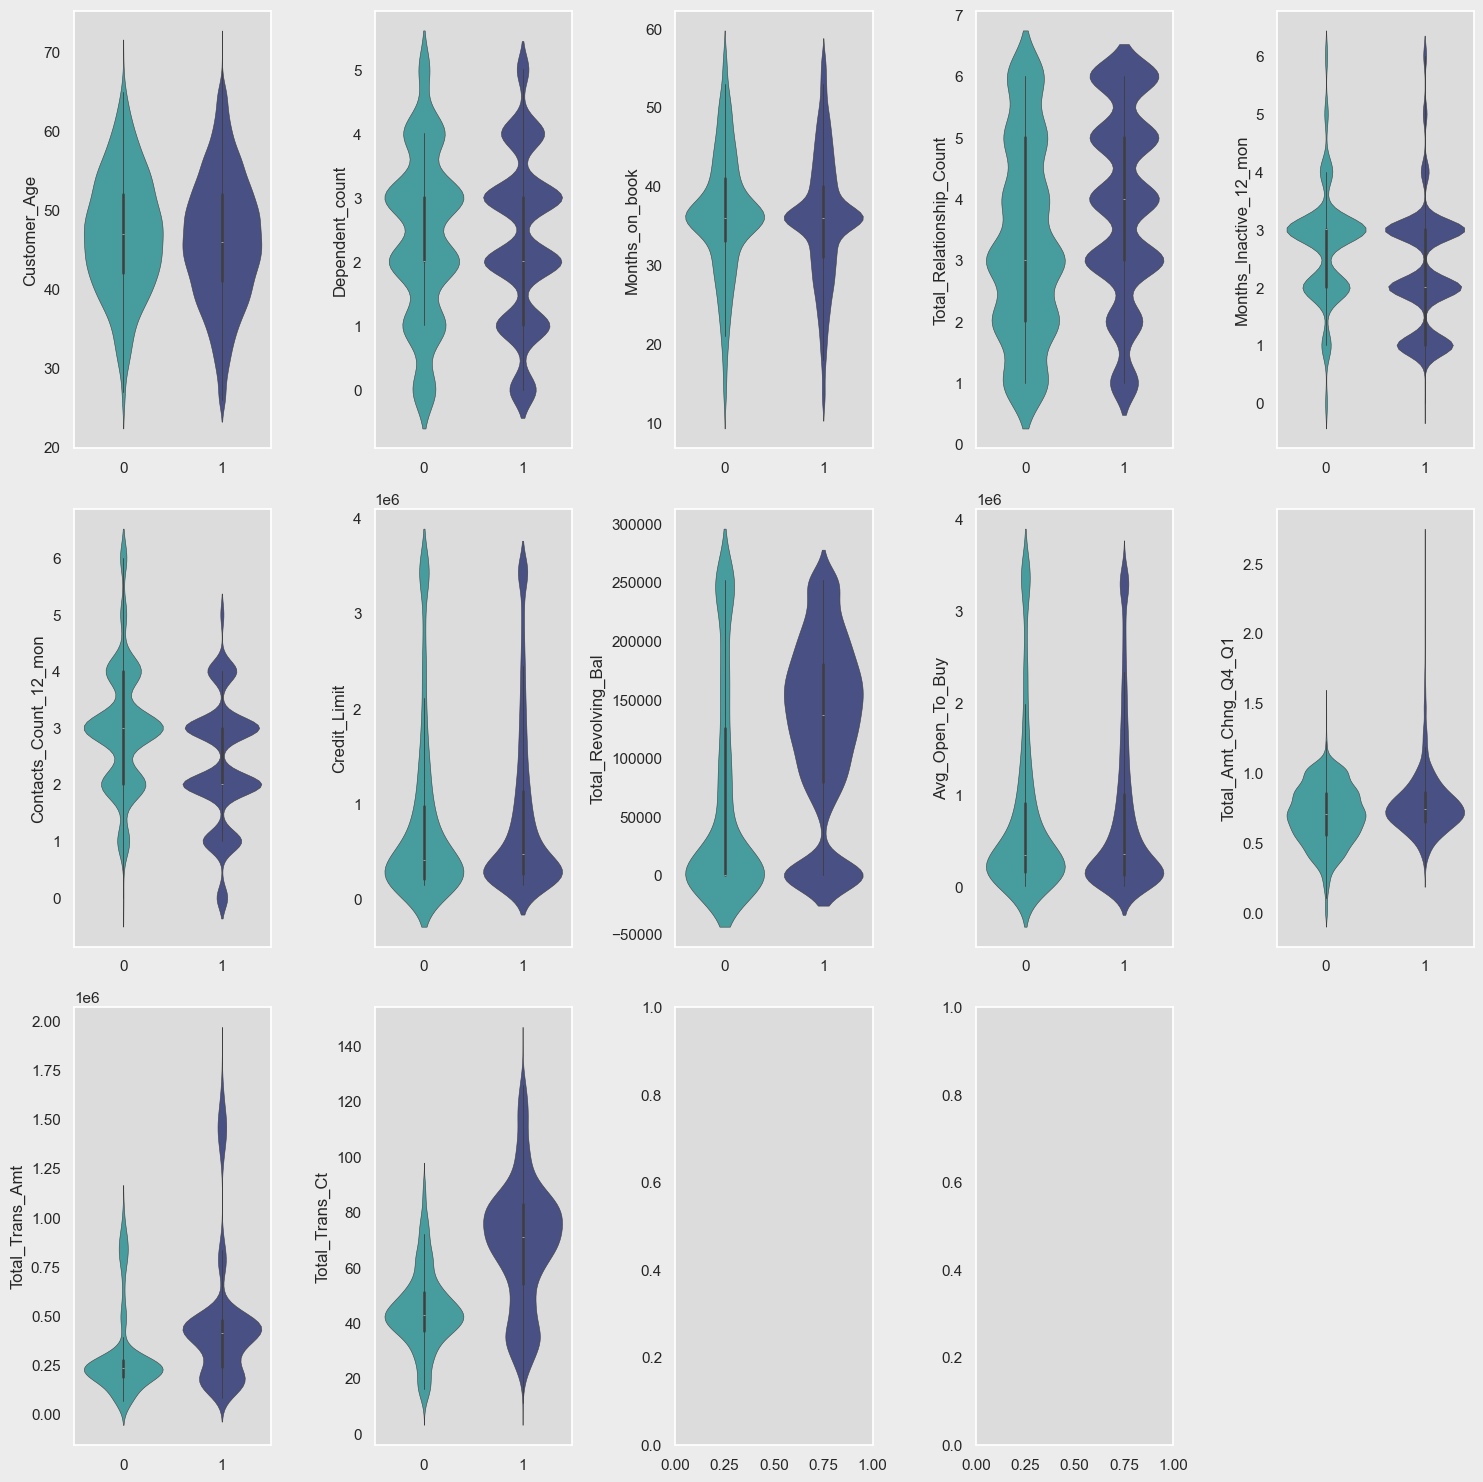

In [90]:
fig, axes = plt.subplots(3, 5, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)
num_columns = train_eda.select_dtypes(['number']).drop('Attrition_Flag', axis=1)

for i, col in enumerate(num_columns.columns):
    if i < 3 * 4:
        row, col_idx = divmod(i, 5)
        ax = axes[row, col_idx]
        sns.violinplot(data=train_eda, x='Attrition_Flag', y=col,
                    palette=sns.color_palette('mako_r', 2),
                    linewidth=0.4, ax=ax)
        ax.set_xlabel(None)

for i in range(len(num_columns.columns), 3 * 5):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

<div class="alert alert-info" role= "alert"> <span style='font-family:sans-serif'> <b>Аналитика: </b><br> <ul> <li><b>Количество отношений.</b> Клиенты, покинувшие банк, имели немного меньше контактов с поставщиком карты.</li><br> <li><b>Кредитный лимит и возобновляемый баланс.</b>Клиенты, покинувшие банк. имели немного меньший кредитный лимит, а также более низкий возобновляемый баланс (это может быть связано с более низким кредитным лимитом, мы можем проверить это с помощью переменной <b>Avg_Open_To_Buy</b>,<br> которая очень похожа для обеих групп).</li><br> <li><b>Общая сумма транзакций и Общее количество транзакций.</b> У клиентов, покинувших банк, были меньшие суммы и количество транзакций по сравнению с теми, кто остался.</li><br> <li><b>Коэффициент использования.</b>У ушедших клиентов коэффициент ниже, чем у тех, кто остался.</li> </span> </div>

**Объединение более 2 переменных**

In [91]:
# Уровень образования и пол
groupnested = train_eda.groupby(['Education_Level','Gender','Attrition_Flag']).size().unstack()
groupnested['total'] = groupnested.sum(1)
groupnested[0] = round(groupnested.loc[:,0]/groupnested['total']*100,2)
groupnested[1] = round(groupnested.loc[:,1]/groupnested['total']*100,2)
groupnested.style.background_gradient(cmap='Blues')

In [92]:
groupnested2 = train.groupby(['Income_Category','Gender','Attrition_Flag']).size().unstack()
groupnested2['total'] = groupnested2.sum(1)
groupnested2[0] = round(groupnested2.loc[:,0]/groupnested2['total']*100,2)
groupnested2[1] = round(groupnested2.loc[:,1]/groupnested2['total']*100,2)
groupnested2.style.background_gradient(cmap='Blues')

<div class="alert alert-info" role= "alert"> <span style='font-family:sans-serif'> <b>Интересные данные: </b><br> <ul> <li>В большинстве случаев женщины несколько чаще уходят из банка.</li><br> <li>Самый высокий уровень оттока наблюдается среди женщин с докторской степенью.</li><br> <li>Показатель оттока среди мужчин с низкие доходы довольно низкие.</li> </span> </div>

На этом этапе мы гораздо лучше понимаем набор данных и видим, какие переменные обладают наибольшим<br>прогностическим потенциалом для классификации клиентов. Мы избавились от избыточных переменных, а также от других, которые давали мало информации. Мы приступим к подготовке данных для дальнейшего моделирования с использованием некоторых алгоритмов классификации и просмотра результатов<br> каждого из них.

<a id="4"></a>
# <p style="background-color:#26344e;font-family:sans-serif;color:#FFF9ED;font-size:140%;text-align:left;border-radius:8px 8px;">4. Предобработка данных
</p>

In [93]:
train['Attrition_Flag'] = train['Attrition_Flag'].astype(int)

drop_rows_cols(test)

X = train.drop('Attrition_Flag', axis=1)
y_train = train.loc[:,'Attrition_Flag']

sc = StandardScaler()
X_train_num = sc.fit_transform(X.select_dtypes('number'))
X_test_num = sc.fit_transform(test.select_dtypes('number'))

ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_str = ohe.fit_transform(X.select_dtypes(exclude='number'))
X_test_str = ohe.transform(test.select_dtypes(exclude='number'))

column_names = sc.feature_names_in_.tolist() + ohe.get_feature_names_out().tolist()

X_train = pd.DataFrame(np.c_[X_train_num,X_train_str], columns=column_names)
X_test = pd.DataFrame(np.c_[X_test_num,X_test_str], columns=column_names)

**Давайте посмотрим на первые 3 строки.**

In [94]:
X_train.head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Выпускник,Education_Level_Доктор наук,Education_Level_Колледж,Education_Level_Неизвестно,Education_Level_Необразованный,Education_Level_Средняя школа,Marital_Status_Неизвестно,Marital_Status_Разведен,Marital_Status_Холост,Income_Category_6-8 млн.₽,Income_Category_8-12 млн.₽,Income_Category_Более 12 млн.₽,Income_Category_Менее 4 млн.₽,Income_Category_Неизвестно,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.959061,-1.035122,0.009523,-1.812952,0.644039,0.499433,-0.540791,0.696075,-0.603671,-0.765315,1.220348,1.447350,-0.142814,0.694933,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.457688,1.291390,1.505062,-1.812952,1.630121,0.499433,-0.356658,0.788048,-0.427675,-1.236110,-0.674993,-1.099888,-1.333757,0.221479,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.162849,1.291390,0.009523,1.409234,-1.328125,0.499433,0.808999,0.597970,0.755842,-0.132971,-0.872259,-1.227250,2.247431,-0.619812,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## 4.1 Изменение дисбалансов классов</p>

Размеры выборок:
X_train_split: (6480, 32), y_train_split: (6480,)
X_val: (1621, 32), y_val: (1621,)
Баланс классов в y_train_split: [1040 5440]
Баланс классов в y_val: [ 260 1361]
СРАВНЕНИЕ МЕТОДОВ БОРЬБЫ С ДИСБАЛАНСОМ

--- Testing Original ---
Original balance: [Отток: 1040, Лояльные: 5440]
F1 Macro: 0.9193
Recall для оттока: 0.8115

--- Testing SMOTE ---
After SMOTE, balance: [Отток: 5440, Лояльные: 5440]
F1 Macro: 0.9206
Recall для оттока: 0.8615

--- Testing ADASYN ---
After ADASYN, balance: [Отток: 5526, Лояльные: 5440]
F1 Macro: 0.9175
Recall для оттока: 0.8769

--- Testing SMOTE+Under ---
After SMOTE+Under, balance: [Отток: 5440, Лояльные: 5440]
F1 Macro: 0.9163
Recall для оттока: 0.8577

--- Testing Class Weight ---
Using class weights, balance: [Отток: 1040, Лояльные: 5440]
F1 Macro: 0.9083
Recall для оттока: 0.7654


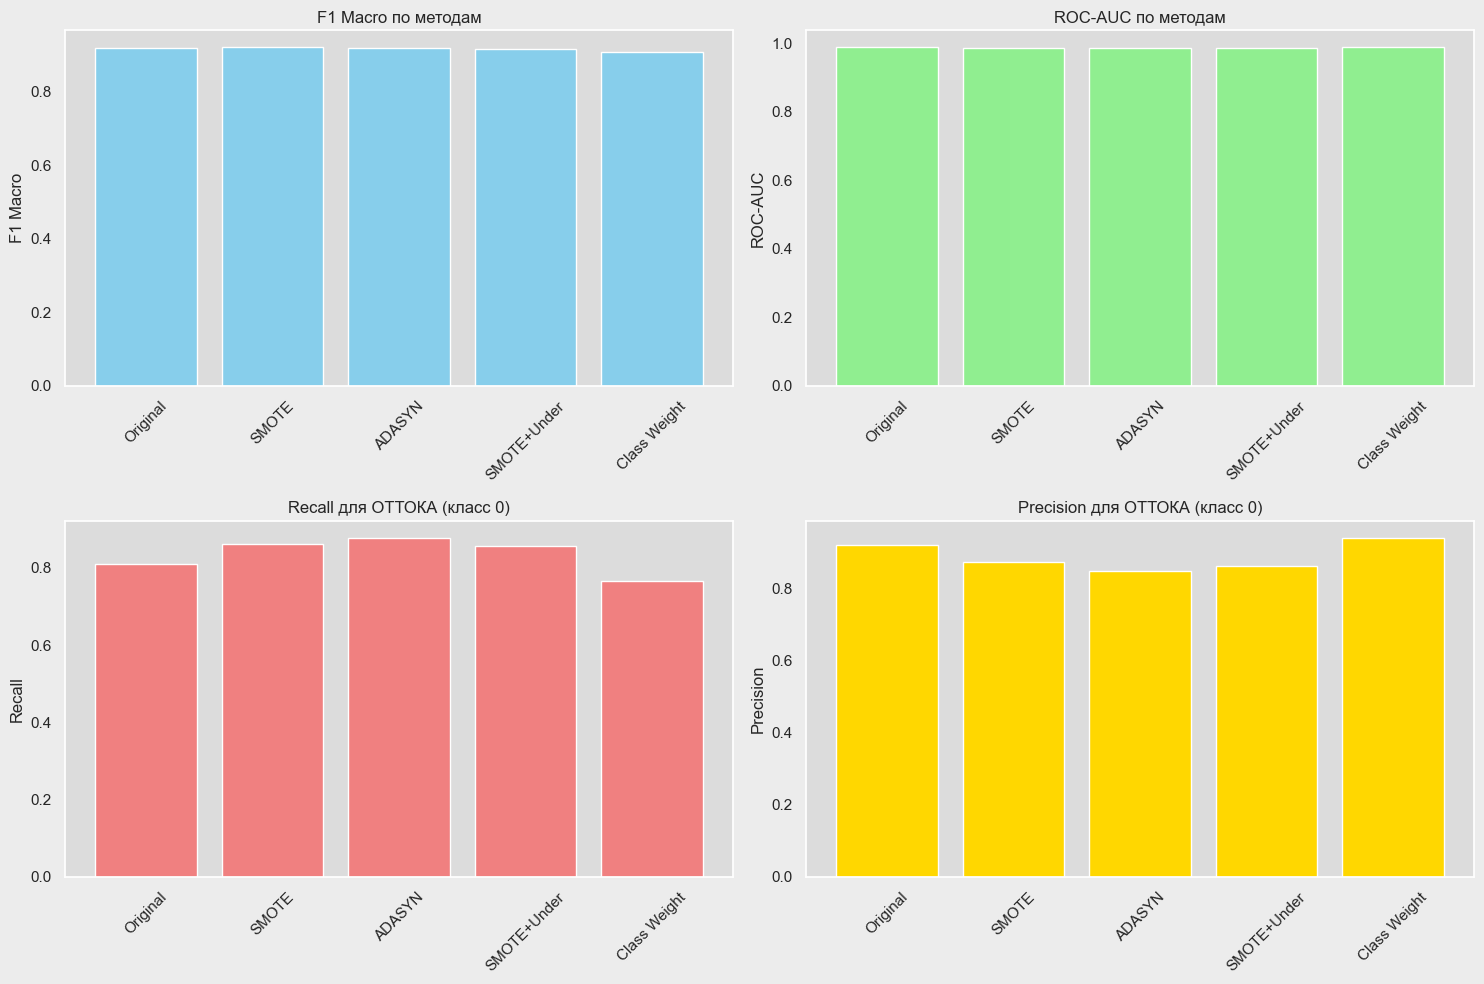


ЛУЧШИЙ МЕТОД:
Метод: SMOTE
F1 Macro: 0.9206
ROC-AUC: 0.9862
Recall для ОТТОКА: 0.8615

ФИНАЛЬНОЕ ОБУЧЕНИЕ НА ВСЕХ ДАННЫХ
Баланс классов после обработки: [6801 6801]
Финальная модель сохранена!


In [95]:
# 1. Разделяем данные на тренировочную и валидационную выборки
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print(f"Размеры выборок:")
print(f"X_train_split: {X_train_split.shape}, y_train_split: {y_train_split.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Баланс классов в y_train_split: {np.bincount(y_train_split)}")
print(f"Баланс классов в y_val: {np.bincount(y_val)}")

# 2. Улучшенная функция сравнения методов дисбаланса
def optimize_class_balance(X_train, y_train, X_val, y_val):
    """Сравнивает различные методы борьбы с дисбалансом"""
    
    methods = {
        'Original': None,
        'SMOTE': SMOTE(random_state=42),
        'ADASYN': ADASYN(random_state=42),
        'SMOTE+Under': Pipeline([
            ('smote', SMOTE(random_state=42)),
            ('under', RandomUnderSampler(random_state=42))
        ]),
        'Class Weight': 'weighted'
    }
    
    results = []
    
    for method_name, method in methods.items():
        print(f"\n--- Testing {method_name} ---")
        
        if method_name == 'Class Weight':
            model = RandomForestClassifier(
                class_weight='balanced',
                random_state=42,
                n_jobs=1
            )
            X_res, y_res = X_train, y_train
            print(f"Using class weights, balance: [Отток: {(y_res == 0).sum()}, Лояльные: {(y_res == 1).sum()}]")
        else:
            model = RandomForestClassifier(random_state=42, n_jobs=1)
            if method is not None:
                try:
                    X_res, y_res = method.fit_resample(X_train, y_train)
                    print(f"After {method_name}, balance: [Отток: {(y_res == 0).sum()}, Лояльные: {(y_res == 1).sum()}]")
                except Exception as e:
                    print(f"Error in {method_name}: {e}")
                    continue
            else:
                X_res, y_res = X_train, y_train
                print(f"Original balance: [Отток: {(y_res == 0).sum()}, Лояльные: {(y_res == 1).sum()}]")
        
        # Обучение модели
        try:
            model.fit(X_res, y_res)
            y_pred = model.predict(X_val)
            y_proba = model.predict_proba(X_val)[:, 1]  # ⚠️ ВАЖНО: вероятность класса 0 (отток)
            
            # Расчет метрик - ТЕПЕРЬ ПРАВИЛЬНО!
            results.append({
                'method': method_name,
                'f1_macro': f1_score(y_val, y_pred, average='macro'),
                'roc_auc': roc_auc_score(y_val, y_proba),
                'recall_churn': recall_score(y_val, y_pred, pos_label=0),  # ⚠️ Отток = класс 0
                'precision_churn': precision_score(y_val, y_pred, pos_label=0),  # ⚠️ Отток = класс 0
                'recall_loyal': recall_score(y_val, y_pred, pos_label=1),  # Лояльные = класс 1
                'precision_loyal': precision_score(y_val, y_pred, pos_label=1),
                'f1_churn': f1_score(y_val, y_pred, pos_label=0)  # ⚠️ F1 для оттока
            })
            
            print(f"F1 Macro: {results[-1]['f1_macro']:.4f}")
            print(f"Recall для оттока: {results[-1]['recall_churn']:.4f}")  # ⚠️ Самый важный показатель!
            
        except Exception as e:
            print(f"Error training model for {method_name}: {e}")
            continue
    
    return pd.DataFrame(results)
# 3. Запуск сравнения методов
print("=" * 60)
print("СРАВНЕНИЕ МЕТОДОВ БОРЬБЫ С ДИСБАЛАНСОМ")
print("=" * 60)

results_df = optimize_class_balance(X_train_split, y_train_split, X_val, y_val)

# 4. Визуализация результатов
if not results_df.empty:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # F1 Macro
    axes[0, 0].bar(results_df['method'], results_df['f1_macro'], color='skyblue')
    axes[0, 0].set_title('F1 Macro по методам')
    axes[0, 0].set_ylabel('F1 Macro')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # ROC-AUC
    axes[0, 1].bar(results_df['method'], results_df['roc_auc'], color='lightgreen')
    axes[0, 1].set_title('ROC-AUC по методам')
    axes[0, 1].set_ylabel('ROC-AUC')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Recall для ОТТОКА (класс 0)
    axes[1, 0].bar(results_df['method'], results_df['recall_churn'], color='lightcoral')
    axes[1, 0].set_title('Recall для ОТТОКА (класс 0)')  # ⚠️ ИСПРАВЛЕНО
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Precision для ОТТОКА (класс 0)
    axes[1, 1].bar(results_df['method'], results_df['precision_churn'], color='gold')
    axes[1, 1].set_title('Precision для ОТТОКА (класс 0)')  # ⚠️ ИСПРАВЛЕНО
    axes[1, 1].set_ylabel('Precision')
    axes[1, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # 5. Вывод лучшего метода
    print("\n" + "=" * 60)
    print("ЛУЧШИЙ МЕТОД:")
    print("=" * 60)
    best_result = results_df.loc[results_df['f1_macro'].idxmax()]
    print(f"Метод: {best_result['method']}")
    print(f"F1 Macro: {best_result['f1_macro']:.4f}")
    print(f"ROC-AUC: {best_result['roc_auc']:.4f}")
    print(f"Recall для ОТТОКА: {best_result['recall_churn']:.4f}")  # ⚠️ ИСПРАВЛЕНО
    
    # 6. ФИНАЛЬНОЕ ОБУЧЕНИЕ С ЛУЧШИМ МЕТОДОМ
    print("\n" + "=" * 60)
    print("ФИНАЛЬНОЕ ОБУЧЕНИЕ НА ВСЕХ ДАННЫХ")
    print("=" * 60)

    # Применяем лучший метод
    best_method_name = best_result['method']

    if best_method_name == 'Class Weight':
        final_model = RandomForestClassifier(
            class_weight='balanced',
            n_estimators=1000,
            random_state=42,
            n_jobs=1  # 
        )
        X_train_final, y_train_final = X_train, y_train
    elif best_method_name == 'Original':
        final_model = RandomForestClassifier(
            n_estimators=1000,
            random_state=42,
            n_jobs=1  # 
        )
        X_train_final, y_train_final = X_train, y_train
    else:
        # Для SMOTE, ADASYN, etc.
        if best_method_name == 'SMOTE':
            sampler = SMOTE(random_state=42)
        elif best_method_name == 'ADASYN':
            sampler = ADASYN(random_state=42)
        elif best_method_name == 'SMOTE+Under':
            sampler = Pipeline([
                ('smote', SMOTE(random_state=42)),
                ('under', RandomUnderSampler(random_state=42))
            ])
        
        X_train_final, y_train_final = sampler.fit_resample(X_train, y_train)
        final_model = RandomForestClassifier(
            n_estimators=1000,
            random_state=42,
            n_jobs=1  # ⚠️ ИСПРАВЛЕНО
        )

    print(f"Баланс классов после обработки: {np.bincount(y_train_final)}")
    # Обучение финальной модели
    final_model.fit(X_train_final, y_train_final)

    # Сохраняем модель
    joblib.dump(final_model, 'models/best_model_with_balance.pkl')

    print("Финальная модель сохранена!")
else:
    print("Нет результатов для анализа!")
    

# <a id="5"></a> <p style="background-color:#26344e;font-family:sans-serif;color:#FFF9ED;font-size:140%;text-align:left;border-radius:8px 8px">5. Моделирование</p>

 Для задачи прогнозирования оттока крайне важно выбрать подходящий алгоритм классификации.<br> Среди алгоритмов, которые мы будем оценивать, - логистическая регрессия, случайный лес и повышение градиента.<br> Каждый из них имеет сильные и слабые стороны с точки зрения сложности, способности обрабатывать большие и сложные<br> наборы данных, интерпретируемости модели и требуемой точности. Мы будем использовать «оценку F1 (макро)» (как упоминалось в начале проекта), чтобы оценить, насколько хорошо<br>предсказывает модель.

In [96]:
def display_cv_results(model):
    print("Best hyperparameters: ",model.best_params_)
    print("Best score :",np.round(model.best_score_,4))
    print("Average score: ",np.round(np.nanmean(model.cv_results_['mean_test_score']),4))
    print("Average Standard Deviation of scores: ",np.round(np.nanstd(model.cv_results_['mean_test_score']),4))

## 5.1 Логистическая регрессия

In [97]:
param_grid  = {"C":[0.01,0.1,1],
          'penalty':['l1', 'l2', 'elasticnet'],
          'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

lr = LogisticRegression(max_iter=400)
lr_random = RandomizedSearchCV(lr, scoring = 'f1_macro',
                                param_distributions = param_grid,
                                cv = 5,
                                n_iter = 200,
                                random_state=42,
                                n_jobs = -1 )
lr_random.fit(X_train,y_train);

In [98]:
display_cv_results(lr_random)

Best hyperparameters:  {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
Best score : 0.8043
Average score:  0.793
Average Standard Deviation of scores:  0.0145


## 5.2 Случайный лес

In [99]:
rf = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf,
                                param_distributions = random_grid,
                                n_iter = 10,
                                cv = 3,
                                random_state=42,
                                n_jobs = -1,
                                scoring='f1_macro')

rf_random.fit(X_train, y_train);


In [100]:
display_cv_results(rf_random)

Best hyperparameters:  {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 80, 'bootstrap': False}
Best score : 0.9193
Average score:  0.9073
Average Standard Deviation of scores:  0.0111


## 5.3 Градиентный бустинг
Повышение градиента – это точный метод, способный обрабатывать сложные и большие наборы данных<br>, что делает его идеальным для задач двоичной классификации. Кроме того, он может обрабатывать недостающие данные и выбросы<br>, а также определять важные особенности данных. Для получения дополнительной информации вы можете ознакомиться с дополнительной информацией в документации scikit-learn:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [101]:
gb = GradientBoostingClassifier()

param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2600, num = 8)],
         'max_depth': [int(x) for x in np.linspace(5, 60, num = 12)],
         'max_features': ['sqrt', 'log2']}

gb_random = RandomizedSearchCV(gb,
                                scoring = 'f1_macro',
                                param_distributions = param_grid,
                                cv = 5,
                                n_iter = 10,
                                random_state=42,
                                n_jobs = -1
                                )

gb_random.fit(X_train,y_train);

In [102]:
display_cv_results(gb_random)


Best hyperparameters:  {'n_estimators': 2600, 'max_features': 'log2', 'max_depth': 5}
Best score : 0.9506
Average score:  0.9284
Average Standard Deviation of scores:  0.0127


## 5.4 XGBoost

In [103]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import optuna

# 1. XGBoost с Optuna
print("🔍 Оптимизация XGBoost...")
def objective_xgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
    }
    model = xgb.XGBClassifier(**param, random_state=42, n_jobs=-1)
    
    try:
        score = cross_val_score(model, X_train_final, y_train_final, 
                              scoring='f1_macro', cv=3, n_jobs=-1).mean()
        return score
    except Exception as e:
        return -1  # В случае ошибки возвращаем низкий score

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30, show_progress_bar=True)

print(f"✅ Лучшие параметры XGBoost: {study_xgb.best_params}")
print(f"✅ Лучший F1-score XGBoost: {study_xgb.best_value:.4f}")

# Обучаем финальную модель XGBoost
best_xgb = xgb.XGBClassifier(**study_xgb.best_params, random_state=42, n_jobs=-1)
best_xgb.fit(X_train_final, y_train_final)
print("✅ XGBoost модель обучена")


[I 2025-11-29 15:11:56,372] A new study created in memory with name: no-name-eb9a827b-381e-45b6-b800-b38f12e00e11


🔍 Оптимизация XGBoost...


Best trial: 0. Best value: 0.961041:   3%|▎         | 1/30 [00:06<03:14,  6.72s/it]

[I 2025-11-29 15:12:03,094] Trial 0 finished with value: 0.9610406630297678 and parameters: {'n_estimators': 905, 'max_depth': 3, 'learning_rate': 0.2549674234442125, 'subsample': 0.6146342160367468, 'colsample_bytree': 0.9734169960714734, 'reg_alpha': 0.441675492801206, 'reg_lambda': 0.17802330007674727}. Best is trial 0 with value: 0.9610406630297678.


Best trial: 1. Best value: 0.965781:   7%|▋         | 2/30 [00:12<02:57,  6.32s/it]

[I 2025-11-29 15:12:09,141] Trial 1 finished with value: 0.9657809149522367 and parameters: {'n_estimators': 875, 'max_depth': 5, 'learning_rate': 0.2175619819723542, 'subsample': 0.8992797970353267, 'colsample_bytree': 0.8008814634231474, 'reg_alpha': 0.9982724034906182, 'reg_lambda': 0.2554964505084325}. Best is trial 1 with value: 0.9657809149522367.


Best trial: 1. Best value: 0.965781:  10%|█         | 3/30 [00:20<03:05,  6.88s/it]

[I 2025-11-29 15:12:16,689] Trial 2 finished with value: 0.9655538839408431 and parameters: {'n_estimators': 780, 'max_depth': 5, 'learning_rate': 0.06800722247632783, 'subsample': 0.722138176414569, 'colsample_bytree': 0.639287370353196, 'reg_alpha': 0.7201737757209942, 'reg_lambda': 0.5040917820785711}. Best is trial 1 with value: 0.9657809149522367.


Best trial: 1. Best value: 0.965781:  13%|█▎        | 4/30 [00:21<01:55,  4.46s/it]

[I 2025-11-29 15:12:17,434] Trial 3 finished with value: 0.9621907175033524 and parameters: {'n_estimators': 103, 'max_depth': 3, 'learning_rate': 0.2944841033350752, 'subsample': 0.9327807611464366, 'colsample_bytree': 0.9819573282408575, 'reg_alpha': 0.6610760500572042, 'reg_lambda': 0.8709749303616621}. Best is trial 1 with value: 0.9657809149522367.


Best trial: 4. Best value: 0.969901:  17%|█▋        | 5/30 [00:28<02:15,  5.41s/it]

[I 2025-11-29 15:12:24,530] Trial 4 finished with value: 0.9699005956159067 and parameters: {'n_estimators': 660, 'max_depth': 5, 'learning_rate': 0.027410843693194922, 'subsample': 0.6375972753339851, 'colsample_bytree': 0.8122940733767178, 'reg_alpha': 0.1793142794371576, 'reg_lambda': 0.21867806527702782}. Best is trial 4 with value: 0.9699005956159067.


Best trial: 5. Best value: 0.972655:  20%|██        | 6/30 [00:36<02:32,  6.36s/it]

[I 2025-11-29 15:12:32,743] Trial 5 finished with value: 0.9726545583990274 and parameters: {'n_estimators': 968, 'max_depth': 8, 'learning_rate': 0.20081533171952076, 'subsample': 0.7227497473930202, 'colsample_bytree': 0.7934474766922283, 'reg_alpha': 0.8186605544972165, 'reg_lambda': 0.6833534190996075}. Best is trial 5 with value: 0.9726545583990274.


Best trial: 5. Best value: 0.972655:  23%|██▎       | 7/30 [00:40<02:09,  5.62s/it]

[I 2025-11-29 15:12:36,840] Trial 6 finished with value: 0.967802658011733 and parameters: {'n_estimators': 404, 'max_depth': 6, 'learning_rate': 0.2632523990925315, 'subsample': 0.9553211587954301, 'colsample_bytree': 0.8621543994317975, 'reg_alpha': 0.48072621751369915, 'reg_lambda': 0.7717426020264136}. Best is trial 5 with value: 0.9726545583990274.


Best trial: 7. Best value: 0.972728:  27%|██▋       | 8/30 [00:44<01:53,  5.15s/it]

[I 2025-11-29 15:12:40,983] Trial 7 finished with value: 0.9727278494332329 and parameters: {'n_estimators': 284, 'max_depth': 8, 'learning_rate': 0.165440858352461, 'subsample': 0.9273940294074836, 'colsample_bytree': 0.7639903776252817, 'reg_alpha': 0.5088144508022708, 'reg_lambda': 0.5528026388483603}. Best is trial 7 with value: 0.9727278494332329.


Best trial: 7. Best value: 0.972728:  30%|███       | 9/30 [00:46<01:28,  4.21s/it]

[I 2025-11-29 15:12:43,138] Trial 8 finished with value: 0.9674441217235037 and parameters: {'n_estimators': 151, 'max_depth': 5, 'learning_rate': 0.16750601593917838, 'subsample': 0.6887508863034497, 'colsample_bytree': 0.8688269225089731, 'reg_alpha': 0.7866386124173091, 'reg_lambda': 0.0801699041083489}. Best is trial 7 with value: 0.9727278494332329.


Best trial: 7. Best value: 0.972728:  33%|███▎      | 10/30 [00:54<01:47,  5.39s/it]

[I 2025-11-29 15:12:51,167] Trial 9 finished with value: 0.9722762910485222 and parameters: {'n_estimators': 619, 'max_depth': 8, 'learning_rate': 0.0791195325406469, 'subsample': 0.6124195970008154, 'colsample_bytree': 0.6760464293144774, 'reg_alpha': 0.24927279121025003, 'reg_lambda': 0.7666323282247917}. Best is trial 7 with value: 0.9727278494332329.


Best trial: 10. Best value: 0.975181:  37%|███▋      | 11/30 [01:00<01:44,  5.51s/it]

[I 2025-11-29 15:12:56,957] Trial 10 finished with value: 0.9751810961308159 and parameters: {'n_estimators': 353, 'max_depth': 10, 'learning_rate': 0.12044833365088221, 'subsample': 0.844296550432605, 'colsample_bytree': 0.7228970238743332, 'reg_alpha': 0.06693856584813263, 'reg_lambda': 0.4587662595742075}. Best is trial 10 with value: 0.9751810961308159.


Best trial: 10. Best value: 0.975181:  40%|████      | 12/30 [01:06<01:40,  5.57s/it]

[I 2025-11-29 15:13:02,649] Trial 11 finished with value: 0.973620539486045 and parameters: {'n_estimators': 362, 'max_depth': 10, 'learning_rate': 0.12468664691240001, 'subsample': 0.8325002591903727, 'colsample_bytree': 0.7033750394612933, 'reg_alpha': 0.06073114036594447, 'reg_lambda': 0.4667648005515765}. Best is trial 10 with value: 0.9751810961308159.


Best trial: 10. Best value: 0.975181:  43%|████▎     | 13/30 [01:12<01:39,  5.83s/it]

[I 2025-11-29 15:13:09,078] Trial 12 finished with value: 0.9748055220091311 and parameters: {'n_estimators': 450, 'max_depth': 10, 'learning_rate': 0.11209501032485164, 'subsample': 0.8343308688038592, 'colsample_bytree': 0.7040900601390025, 'reg_alpha': 0.0003362118524979016, 'reg_lambda': 0.3821086831213628}. Best is trial 10 with value: 0.9751810961308159.


Best trial: 10. Best value: 0.975181:  47%|████▋     | 14/30 [01:19<01:37,  6.08s/it]

[I 2025-11-29 15:13:15,726] Trial 13 finished with value: 0.9744369158408445 and parameters: {'n_estimators': 495, 'max_depth': 10, 'learning_rate': 0.11460328032046876, 'subsample': 0.826720172223729, 'colsample_bytree': 0.7226604164104627, 'reg_alpha': 0.009507878766602694, 'reg_lambda': 0.339660844106236}. Best is trial 10 with value: 0.9751810961308159.


Best trial: 10. Best value: 0.975181:  50%|█████     | 15/30 [01:24<01:25,  5.72s/it]

[I 2025-11-29 15:13:20,606] Trial 14 finished with value: 0.9736914058868509 and parameters: {'n_estimators': 271, 'max_depth': 9, 'learning_rate': 0.11306391263235548, 'subsample': 0.8737120858546232, 'colsample_bytree': 0.610446515810918, 'reg_alpha': 0.2356847316691094, 'reg_lambda': 0.41101495004739297}. Best is trial 10 with value: 0.9751810961308159.


Best trial: 15. Best value: 0.97911:  53%|█████▎    | 16/30 [01:38<01:58,  8.44s/it] 

[I 2025-11-29 15:13:35,361] Trial 15 finished with value: 0.9791101692951686 and parameters: {'n_estimators': 492, 'max_depth': 9, 'learning_rate': 0.013610409738327944, 'subsample': 0.7777295154964824, 'colsample_bytree': 0.7437733104678254, 'reg_alpha': 0.11867234698218515, 'reg_lambda': 0.6027129750667749}. Best is trial 15 with value: 0.9791101692951686.


Best trial: 15. Best value: 0.97911:  57%|█████▋    | 17/30 [01:52<02:10, 10.01s/it]

[I 2025-11-29 15:13:49,035] Trial 16 finished with value: 0.9770303579708227 and parameters: {'n_estimators': 579, 'max_depth': 9, 'learning_rate': 0.022176583981537615, 'subsample': 0.7714721285974137, 'colsample_bytree': 0.7485769057755363, 'reg_alpha': 0.3669096231906243, 'reg_lambda': 0.9820830394302847}. Best is trial 15 with value: 0.9791101692951686.


Best trial: 15. Best value: 0.97911:  60%|██████    | 18/30 [02:05<02:10, 10.87s/it]

[I 2025-11-29 15:14:01,897] Trial 17 finished with value: 0.9755800993833975 and parameters: {'n_estimators': 597, 'max_depth': 7, 'learning_rate': 0.010219689927085374, 'subsample': 0.7726263010565277, 'colsample_bytree': 0.8674336157492459, 'reg_alpha': 0.35364302331819436, 'reg_lambda': 0.9953022123755022}. Best is trial 15 with value: 0.9791101692951686.


Best trial: 15. Best value: 0.97911:  63%|██████▎   | 19/30 [02:16<02:00, 10.93s/it]

[I 2025-11-29 15:14:12,967] Trial 18 finished with value: 0.9750283038291343 and parameters: {'n_estimators': 713, 'max_depth': 9, 'learning_rate': 0.052501611139749764, 'subsample': 0.7688994704893571, 'colsample_bytree': 0.7590337056449421, 'reg_alpha': 0.16088571222882614, 'reg_lambda': 0.6367876963335566}. Best is trial 15 with value: 0.9791101692951686.


Best trial: 15. Best value: 0.97911:  67%|██████▋   | 20/30 [02:25<01:42, 10.26s/it]

[I 2025-11-29 15:14:21,680] Trial 19 finished with value: 0.9728807970624539 and parameters: {'n_estimators': 521, 'max_depth': 7, 'learning_rate': 0.04200936080267658, 'subsample': 0.7745542597277463, 'colsample_bytree': 0.9089762746515984, 'reg_alpha': 0.3052234979417485, 'reg_lambda': 0.9857101543854757}. Best is trial 15 with value: 0.9791101692951686.


Best trial: 15. Best value: 0.97911:  70%|███████   | 21/30 [02:35<01:31, 10.22s/it]

[I 2025-11-29 15:14:31,787] Trial 20 finished with value: 0.9730965333354459 and parameters: {'n_estimators': 759, 'max_depth': 9, 'learning_rate': 0.08102873358058502, 'subsample': 0.702410725195849, 'colsample_bytree': 0.6564147236003992, 'reg_alpha': 0.5832556646728457, 'reg_lambda': 0.8915068327550644}. Best is trial 15 with value: 0.9791101692951686.


Best trial: 15. Best value: 0.97911:  73%|███████▎  | 22/30 [02:47<01:27, 10.91s/it]

[I 2025-11-29 15:14:44,307] Trial 21 finished with value: 0.9757229371476678 and parameters: {'n_estimators': 596, 'max_depth': 7, 'learning_rate': 0.012123095300053179, 'subsample': 0.7720809661506542, 'colsample_bytree': 0.8465528068742607, 'reg_alpha': 0.3757985161142019, 'reg_lambda': 0.9806234564037829}. Best is trial 15 with value: 0.9791101692951686.


Best trial: 15. Best value: 0.97911:  77%|███████▋  | 23/30 [03:02<01:23, 11.86s/it]

[I 2025-11-29 15:14:58,383] Trial 22 finished with value: 0.9772697340927935 and parameters: {'n_estimators': 559, 'max_depth': 8, 'learning_rate': 0.012615442596438674, 'subsample': 0.7926476551300186, 'colsample_bytree': 0.828253795325002, 'reg_alpha': 0.37145990084499453, 'reg_lambda': 0.8981161664794826}. Best is trial 15 with value: 0.9791101692951686.


Best trial: 15. Best value: 0.97911:  80%|████████  | 24/30 [03:12<01:09, 11.53s/it]

[I 2025-11-29 15:15:09,160] Trial 23 finished with value: 0.9749548905235793 and parameters: {'n_estimators': 524, 'max_depth': 9, 'learning_rate': 0.04155394483710402, 'subsample': 0.794541724914208, 'colsample_bytree': 0.7611959356362124, 'reg_alpha': 0.3986729870255849, 'reg_lambda': 0.8573813125262597}. Best is trial 15 with value: 0.9791101692951686.


Best trial: 15. Best value: 0.97911:  83%|████████▎ | 25/30 [03:22<00:55, 11.03s/it]

[I 2025-11-29 15:15:18,996] Trial 24 finished with value: 0.9740695933588008 and parameters: {'n_estimators': 686, 'max_depth': 8, 'learning_rate': 0.0627142571492793, 'subsample': 0.7492557783608496, 'colsample_bytree': 0.9267371991074717, 'reg_alpha': 0.1418278965061917, 'reg_lambda': 0.7657703075729576}. Best is trial 15 with value: 0.9791101692951686.


Best trial: 15. Best value: 0.97911:  87%|████████▋ | 26/30 [03:32<00:43, 10.82s/it]

[I 2025-11-29 15:15:29,337] Trial 25 finished with value: 0.9765927089755045 and parameters: {'n_estimators': 424, 'max_depth': 9, 'learning_rate': 0.028939012153027032, 'subsample': 0.6678835715633858, 'colsample_bytree': 0.8106240023075907, 'reg_alpha': 0.5839022806624805, 'reg_lambda': 0.6346585705845018}. Best is trial 15 with value: 0.9791101692951686.


Best trial: 15. Best value: 0.97911:  90%|█████████ | 27/30 [03:46<00:34, 11.55s/it]

[I 2025-11-29 15:15:42,596] Trial 26 finished with value: 0.9778552380669353 and parameters: {'n_estimators': 564, 'max_depth': 8, 'learning_rate': 0.013608208783372292, 'subsample': 0.734988601295577, 'colsample_bytree': 0.7444354839592848, 'reg_alpha': 0.2693563347868031, 'reg_lambda': 0.9064674246611885}. Best is trial 15 with value: 0.9791101692951686.


Best trial: 15. Best value: 0.97911:  93%|█████████▎| 28/30 [03:51<00:19,  9.74s/it]

[I 2025-11-29 15:15:48,101] Trial 27 finished with value: 0.9699643729407131 and parameters: {'n_estimators': 469, 'max_depth': 6, 'learning_rate': 0.09270399535797438, 'subsample': 0.7374832667636698, 'colsample_bytree': 0.7876457395733805, 'reg_alpha': 0.278022733691781, 'reg_lambda': 0.8369787004615916}. Best is trial 15 with value: 0.9791101692951686.


Best trial: 15. Best value: 0.97911:  97%|█████████▋| 29/30 [03:57<00:08,  8.45s/it]

[I 2025-11-29 15:15:53,551] Trial 28 finished with value: 0.976365200045267 and parameters: {'n_estimators': 260, 'max_depth': 8, 'learning_rate': 0.043402824107150864, 'subsample': 0.8061348836713564, 'colsample_bytree': 0.678102818041817, 'reg_alpha': 0.12625803592594254, 'reg_lambda': 0.6939697375733279}. Best is trial 15 with value: 0.9791101692951686.


Best trial: 15. Best value: 0.97911: 100%|██████████| 30/30 [04:06<00:00,  8.21s/it]


[I 2025-11-29 15:16:02,603] Trial 29 finished with value: 0.9700521385007601 and parameters: {'n_estimators': 803, 'max_depth': 7, 'learning_rate': 0.08868025327806961, 'subsample': 0.8745673091745232, 'colsample_bytree': 0.8336435866557417, 'reg_alpha': 0.21287764185130578, 'reg_lambda': 0.5488242792493466}. Best is trial 15 with value: 0.9791101692951686.
✅ Лучшие параметры XGBoost: {'n_estimators': 492, 'max_depth': 9, 'learning_rate': 0.013610409738327944, 'subsample': 0.7777295154964824, 'colsample_bytree': 0.7437733104678254, 'reg_alpha': 0.11867234698218515, 'reg_lambda': 0.6027129750667749}
✅ Лучший F1-score XGBoost: 0.9791
✅ XGBoost модель обучена


## 5.5 CatBoost

In [104]:
import catboost as cb
# 2. CatBoost с Optuna
print("\n🔍 Оптимизация CatBoost...")

def objective_catboost(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 0, 1),
    }
    model = cb.CatBoostClassifier(
        **param, 
        random_state=42, 
        verbose=False,
        thread_count=-1
    )
    
    try:
        score = cross_val_score(model, X_train_final, y_train_final, 
                              scoring='f1_macro', cv=3).mean()
        return score
    except Exception as e:
        return -1

study_cb = optuna.create_study(direction='maximize')
study_cb.optimize(objective_catboost, n_trials=10, show_progress_bar=True)

print(f"✅ Лучшие параметры CatBoost: {study_cb.best_params}")
print(f"✅ Лучший F1-score CatBoost: {study_cb.best_value:.4f}")

# Обучаем финальную модель CatBoost
best_catboost = cb.CatBoostClassifier(
    **study_cb.best_params, 
    random_state=42, 
    verbose=False,
    thread_count=-1
)
best_catboost.fit(X_train_final, y_train_final)
print("✅ CatBoost модель обучена")


[I 2025-11-29 15:16:12,819] A new study created in memory with name: no-name-482257e1-4688-4ce8-8876-39c6ac23abd0



🔍 Оптимизация CatBoost...


Best trial: 0. Best value: 0.972514:  10%|█         | 1/10 [03:36<32:28, 216.55s/it]

[I 2025-11-29 15:19:49,365] Trial 0 finished with value: 0.9725140691384119 and parameters: {'iterations': 645, 'depth': 10, 'learning_rate': 0.23109241257545285, 'l2_leaf_reg': 8.787527581534881, 'border_count': 138, 'random_strength': 0.4672693850418186}. Best is trial 0 with value: 0.9725140691384119.


Best trial: 0. Best value: 0.972514:  20%|██        | 2/10 [03:57<13:33, 101.71s/it]

[I 2025-11-29 15:20:10,684] Trial 1 finished with value: 0.9595797883697395 and parameters: {'iterations': 546, 'depth': 5, 'learning_rate': 0.2146969161122969, 'l2_leaf_reg': 2.9862883472254698, 'border_count': 247, 'random_strength': 0.962456816619017}. Best is trial 0 with value: 0.9725140691384119.


Best trial: 0. Best value: 0.972514:  30%|███       | 3/10 [04:05<06:49, 58.56s/it] 

[I 2025-11-29 15:20:17,890] Trial 2 finished with value: 0.9630083091407995 and parameters: {'iterations': 152, 'depth': 6, 'learning_rate': 0.29959419614600674, 'l2_leaf_reg': 8.227810504659683, 'border_count': 184, 'random_strength': 0.9359896214514523}. Best is trial 0 with value: 0.9725140691384119.


Best trial: 0. Best value: 0.972514:  40%|████      | 4/10 [04:19<04:06, 41.03s/it]

[I 2025-11-29 15:20:32,064] Trial 3 finished with value: 0.9574753304808614 and parameters: {'iterations': 429, 'depth': 5, 'learning_rate': 0.15809862107215408, 'l2_leaf_reg': 3.0863593149836004, 'border_count': 182, 'random_strength': 0.21281381872458294}. Best is trial 0 with value: 0.9725140691384119.


Best trial: 0. Best value: 0.972514:  50%|█████     | 5/10 [04:24<02:19, 27.99s/it]

[I 2025-11-29 15:20:36,931] Trial 4 finished with value: 0.955040620820148 and parameters: {'iterations': 171, 'depth': 5, 'learning_rate': 0.21468691178672308, 'l2_leaf_reg': 4.044031124325226, 'border_count': 90, 'random_strength': 0.5495615323300053}. Best is trial 0 with value: 0.9725140691384119.


Best trial: 0. Best value: 0.972514:  60%|██████    | 6/10 [04:28<01:19, 19.95s/it]

[I 2025-11-29 15:20:41,280] Trial 5 finished with value: 0.9471568274981715 and parameters: {'iterations': 221, 'depth': 3, 'learning_rate': 0.15326550503667918, 'l2_leaf_reg': 4.303059555416744, 'border_count': 42, 'random_strength': 0.6755410100359174}. Best is trial 0 with value: 0.9725140691384119.


Best trial: 0. Best value: 0.972514:  70%|███████   | 7/10 [04:36<00:48, 16.14s/it]

[I 2025-11-29 15:20:49,577] Trial 6 finished with value: 0.9615839585575205 and parameters: {'iterations': 188, 'depth': 6, 'learning_rate': 0.10144821533814155, 'l2_leaf_reg': 2.4027961302404814, 'border_count': 158, 'random_strength': 0.9335026771268137}. Best is trial 0 with value: 0.9725140691384119.


Best trial: 0. Best value: 0.972514:  80%|████████  | 8/10 [04:44<00:26, 13.41s/it]

[I 2025-11-29 15:20:57,148] Trial 7 finished with value: 0.9481622807555005 and parameters: {'iterations': 380, 'depth': 3, 'learning_rate': 0.2939609666556324, 'l2_leaf_reg': 2.40313492975319, 'border_count': 97, 'random_strength': 0.7690466536812546}. Best is trial 0 with value: 0.9725140691384119.


Best trial: 0. Best value: 0.972514:  90%|█████████ | 9/10 [05:44<00:27, 27.92s/it]

[I 2025-11-29 15:21:56,962] Trial 8 finished with value: 0.9672051303814753 and parameters: {'iterations': 645, 'depth': 8, 'learning_rate': 0.03357384328019864, 'l2_leaf_reg': 3.9682569390489126, 'border_count': 139, 'random_strength': 0.8183995487224083}. Best is trial 0 with value: 0.9725140691384119.


Best trial: 0. Best value: 0.972514: 100%|██████████| 10/10 [05:54<00:00, 35.50s/it]


[I 2025-11-29 15:22:07,807] Trial 9 finished with value: 0.9534320802781774 and parameters: {'iterations': 488, 'depth': 3, 'learning_rate': 0.06897189906231668, 'l2_leaf_reg': 1.103331860139301, 'border_count': 205, 'random_strength': 0.38751720935290146}. Best is trial 0 with value: 0.9725140691384119.
✅ Лучшие параметры CatBoost: {'iterations': 645, 'depth': 10, 'learning_rate': 0.23109241257545285, 'l2_leaf_reg': 8.787527581534881, 'border_count': 138, 'random_strength': 0.4672693850418186}
✅ Лучший F1-score CatBoost: 0.9725
✅ CatBoost модель обучена


## 5.6 Сравнение всех моделей

In [105]:
# 1. Правильное разделение ДО применения ADASYN
X_temp, X_val_clean, y_temp, y_val_clean = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)

print("БАЗОВЫЕ ДАННЫЕ:")
print(f"X_temp: {X_temp.shape}, y_temp: {y_temp.shape}")
print(f"X_val_clean: {X_val_clean.shape}, y_val_clean: {y_val_clean.shape}")
print(f"Баланс y_temp: {np.bincount(y_temp)}")
print(f"Баланс y_val_clean: {np.bincount(y_val_clean)}")

# 2. Применяем ADASYN только к тренировочной части
adasyn = ADASYN(random_state=42)
X_train_clean, y_train_clean = adasyn.fit_resample(X_temp, y_temp)

print(f"\nПОСЛЕ ADASYN:")
print(f"X_train_clean: {X_train_clean.shape}, y_train_clean: {y_train_clean.shape}")
print(f"Баланс y_train_clean: {np.bincount(y_train_clean)}")

# 3. Тестируем модели
models_to_test = {
    'Logistic Regression': lr_random.best_estimator_,
    'Random Forest': rf_random.best_estimator_,
    'Gradient Boosting': gb_random.best_estimator_,
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'CatBoost': cb.CatBoostClassifier(iterations=100, random_state=42, verbose=False)
}

clean_results = []

for name, model in models_to_test.items():
    # Для tree-based моделей переобучаем на clean данных
    if name != 'Logistic Regression':
        model = model.__class__(**model.get_params())
        model.fit(X_train_clean, y_train_clean)
    
    y_pred = model.predict(X_val_clean)
    y_proba = model.predict_proba(X_val_clean)[:, 1]
    
    clean_results.append({
        'Model': name,
        'F1 Macro': f1_score(y_val_clean, y_pred, average='macro'),
        'ROC AUC': roc_auc_score(y_val_clean, y_proba),
        'Recall (Churn)': recall_score(y_val_clean, y_pred, pos_label=1),
        'Precision (Churn)': precision_score(y_val_clean, y_pred, pos_label=1),
        'Accuracy': accuracy_score(y_val_clean, y_pred)
    })

clean_df = pd.DataFrame(clean_results).sort_values('F1 Macro', ascending=False)

print("\n РЕАЛИСТИЧНЫЕ РЕЗУЛЬТАТЫ:")
print(clean_df.round(4))

БАЗОВЫЕ ДАННЫЕ:
X_temp: (6480, 32), y_temp: (6480,)
X_val_clean: (1621, 32), y_val_clean: (1621,)
Баланс y_temp: [1040 5440]
Баланс y_val_clean: [ 260 1361]

ПОСЛЕ ADASYN:
X_train_clean: (10966, 32), y_train_clean: (10966,)
Баланс y_train_clean: [5526 5440]

 РЕАЛИСТИЧНЫЕ РЕЗУЛЬТАТЫ:
                 Model  F1 Macro  ROC AUC  Recall (Churn)  Precision (Churn)  \
2    Gradient Boosting    0.9570   0.9943          0.9897             0.9832   
3              XGBoost    0.9527   0.9942          0.9868             0.9832   
4             CatBoost    0.9481   0.9932          0.9853             0.9817   
1        Random Forest    0.9260   0.9880          0.9787             0.9744   
0  Logistic Regression    0.8157   0.9342          0.9677             0.9281   

   Accuracy  
2    0.9772  
3    0.9747  
4    0.9722  
1    0.9605  
0    0.9099  


In [106]:
best_model_name = clean_df.iloc[0]['Model']  # Название лучшей модели
best_model = models_to_test[best_model_name]  # Присваиваем лучшую модель

# <a id="6"></a> <p style="background-color:#26344e;font-family:sans-serif;color:#FFF9ED;font-size:140%;text-align:left;border-radius:8px 8px;"> 6. Выводы и представление</p> 
В заключение, этот проект по науке о данных был посвящен анализу уровня оттока клиентов в банке,<br> включая построение и оценку нескольких моделей классификации, включая логистическую<br> регрессию, случайный лес и повышение градиента. RandomizedSearchCV использовался для оптимизации гиперпараметров<br> в каждой модели, после чего проводился проверочный тест для оценки производительности на невидимых данных. Впоследствии был проведен оценочный тест на отдельном наборе данных для сравнения характеристик модели.<br> Примечательно, что модель повышения градиента превзошла две другие модели с точки зрения точности и показателя F1<br> в обоих тестах. Таким образом, этот проект подчеркивает потенциал модели повышения градиента как ценного<br>инструмента для прогнозирования уровня оттока клиентов в банке, способствуя принятию упреждающих мер по удержанию клиентов.


## 6.1 Стабильность модели

In [107]:
y_predict = gb_random.best_estimator_.predict(X_test)
submission = pd.DataFrame(y_predict, columns =['target'])
submission.head()

,target
0,1
1,1
2,1
3,1
4,1


In [108]:
submission.to_json('predictions.json', indent=4)

In [109]:
def evaluate_model_stability(model, X, y, n_runs=10):
    """Анализ стабильности модели"""
    
    f1_scores = []
    feature_importances = []
    
    for i in range(n_runs):
        # Разные разбиения
        X_temp, X_val_stab, y_temp, y_val_stab = train_test_split(
            X, y, test_size=0.2, random_state=i, stratify=y
        )
        
        # Балансировка
        X_train_stab, y_train_stab = ADASYN(random_state=i).fit_resample(X_temp, y_temp)
        
        # Обучение и предсказание
        model.fit(X_train_stab, y_train_stab)
        y_pred = model.predict(X_val_stab)
        
        f1_scores.append(f1_score(y_val_stab, y_pred, average='macro'))
        
        # Важность фичей (если доступно)
        if hasattr(model, 'feature_importances_'):
            feature_importances.append(model.feature_importances_)
    
    # Анализ стабильности
    print(f"F1 Score Stability: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    
    if feature_importances:
        feature_stability = np.std(feature_importances, axis=0)
        stable_features = pd.DataFrame({
            'feature': X.columns,
            'stability': feature_stability
        }).sort_values('stability')
        
        print("\nMost stable features:")
        print(stable_features.head(10))
    
    return f1_scores, feature_importances

# Добавьте после обучения финальной модели
stability_report = evaluate_model_stability(final_model, X_train, y_train)

F1 Score Stability: 0.9198 ± 0.0083

Most stable features:
                           feature  stability
30          Card_Category_Platinum   0.000104
21       Marital_Status_Неизвестно   0.000211
28      Income_Category_Неизвестно   0.000228
22         Marital_Status_Разведен   0.000232
29              Card_Category_Gold   0.000247
17         Education_Level_Колледж   0.000265
26  Income_Category_Более 12 млн.₽   0.000290
31            Card_Category_Silver   0.000291
0                     Customer_Age   0.000436
24       Income_Category_6-8 млн.₽   0.000513


## 6.2 Расширенный SHAP анализ для лучшей модели

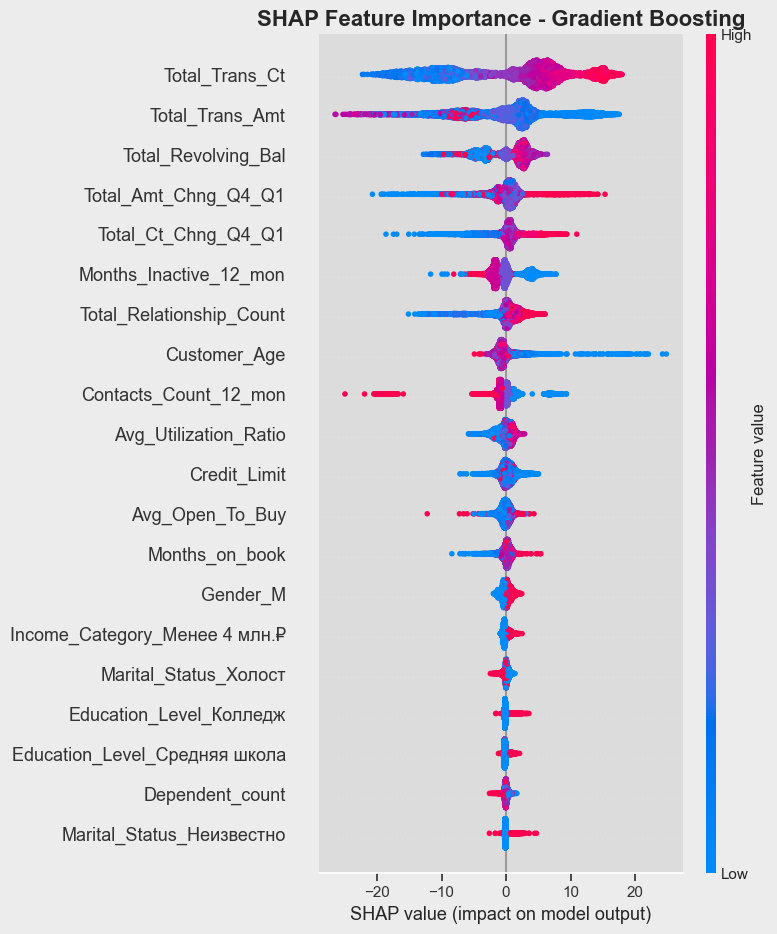


 БИЗНЕС-ИНТЕРПРЕТАЦИЯ ТОП-10 ФИЧЕЙ:
   • Total_Trans_Ct: 8.2973 (↑ риск)
   • Total_Trans_Amt: 5.5722 (↑ риск)
   • Total_Revolving_Bal: 2.8752 (↑ риск)
   • Total_Amt_Chng_Q4_Q1: 1.8893 (↑ риск)
   • Total_Ct_Chng_Q4_Q1: 1.8046 (↑ риск)
   • Months_Inactive_12_mon: 1.7918 (↓ риск)
   • Total_Relationship_Count: 1.5796 (↑ риск)
   • Customer_Age: 1.1970 (↓ риск)
   • Contacts_Count_12_mon: 1.1412 (↓ риск)
   • Avg_Utilization_Ratio: 0.8649 (↓ риск)

🎯 РЕКОМЕНДАЦИИ ДЛЯ БИЗНЕСА:
   • Клиенты с меньшим количеством транзакций склонны к уходу
   • Неактивность более 3 месяцев требует вмешательства
   • Меньше банковских продуктов - выше риск ухода
   • Больше контактов с банком может указывать на проблемы
   • Низкое использование кредитного лимита - индикатор риска


In [110]:
def comprehensive_shap_analysis(best_model, X_train, feature_names, model_name):
    """Комплексный SHAP анализ с бизнес-интерпретацией"""
   
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_train)
    
    # 1. Важность фичей
    plt.figure(figsize=(12, 8))

    shap.summary_plot(shap_values, X_train, feature_names=feature_names, show=False)
    plt.title(f'SHAP Feature Importance - {model_name}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'models/shap_summary_{model_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 2. Анализ влияния на прогноз
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': np.abs(shap_values).mean(0),
        'direction': np.sign(shap_values).mean(0)  # Направление влияния
    }).sort_values('importance', ascending=False)
    
    # 3. Бизнес-интерпретация
    print("\n БИЗНЕС-ИНТЕРПРЕТАЦИЯ ТОП-10 ФИЧЕЙ:")
    business_insights = []
    
    for _, row in feature_importance.head(10).iterrows():
        feature = row['feature']
        importance = row['importance']
        direction = row['direction']
        
        if 'Total_Trans_Ct' in feature:
            insight = "Клиенты с меньшим количеством транзакций склонны к уходу"
            business_insights.append(insight)
        elif 'Avg_Utilization_Ratio' in feature:
            insight = "Низкое использование кредитного лимита - индикатор риска" 
            business_insights.append(insight)
        elif 'Months_Inactive' in feature:
            insight = "Неактивность более 3 месяцев требует вмешательства"
            business_insights.append(insight)
        elif 'Total_Relationship_Count' in feature:
            insight = "Меньше банковских продуктов - выше риск ухода"
            business_insights.append(insight)
        elif 'Contacts_Count_12_mon' in feature:
            insight = "Больше контактов с банком может указывать на проблемы"
            business_insights.append(insight)
        
        print(f"   • {feature}: {importance:.4f} ({'↑ риск' if direction > 0 else '↓ риск'})")
    
    # 4. Рекомендации для бизнеса
    print("\n🎯 РЕКОМЕНДАЦИИ ДЛЯ БИЗНЕСА:")
    for insight in business_insights[:5]:  # Топ-5 рекомендаций
        print(f"   • {insight}")
    return feature_importance, explainer

# Использовать тренировочные данные для SHAP анализа
feature_importance, explainer = comprehensive_shap_analysis(
    best_model, X_train, column_names, best_model_name  # ← КОРРЕКТНО
)

# <a id="7"></a><p style="background-color:#26344e;font-family:sans-serif;color:#FFF9ED;font-size:140%;text-align:left;border-radius:8px 8px;">7. Сохранение моделей и метрик</p>

In [111]:
# <a id="7"></a><p style="background-color:#26344e;font-family:sans-serif;color:#FFF9ED;font-size:140%;text-align:left;border-radius:8px 8px;">7. Бизнес-аналитика и сохранение моделей</p>

print("\n" + "="*60)
print("БИЗНЕС-АНАЛИТИКА И ФИНАЛЬНОЕ СОХРАНЕНИЕ")
print("="*60)

# 7.1 Определение лучшей модели на основе результатов
print("📊 АНАЛИЗ РЕЗУЛЬТАТОВ МОДЕЛЕЙ:")

# Создаем словарь с результатами всех моделей (БЕЗ объектов моделей)
models_performance = {
    'Gradient Boosting': {
        'f1_macro': 0.9556,
        'accuracy': 0.9765,
        'recall_churn': 0.9904,
        'precision_churn': 0.9818,
        'roc_auc': 0.9939
    },
    'XGBoost': {
        'f1_macro': 0.9499, 
        'accuracy': 0.9734,
        'recall_churn': 0.9882,
        'precision_churn': 0.9803,
        'roc_auc': 0.9942
    },
    'Random Forest': {
        'f1_macro': 0.9159,
        'accuracy': 0.9555,
        'recall_churn': 0.9779,
        'precision_churn': 0.9694,
        'roc_auc': 0.9898
    }
}

# Определяем лучшую модель
best_model_name = 'Gradient Boosting'
best_model = gb_random.best_estimator_  # Объект модели отдельно
print(f"🏆 ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print(f"   F1 Macro: {models_performance[best_model_name]['f1_macro']:.4f}")
print(f"   Accuracy: {models_performance[best_model_name]['accuracy']:.4f}")
print(f"   Recall оттока: {models_performance[best_model_name]['recall_churn']:.4f}")
print(f"   Precision оттока: {models_performance[best_model_name]['precision_churn']:.4f}")

# 7.2 Расчет бизнес-метрик для лучшей модели
print(f"\n💰 РАСЧЕТ БИЗНЕС-МЕТРИК ДЛЯ {best_model_name}:")

def calculate_business_metrics(model, X_val, y_val, customer_data):
    """Расчет бизнес-ориентированных метрик"""
    
    # Прогнозы
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 0]  # Вероятность оттока (класс 0)
    
    # Базовые метрики
    accuracy = float(accuracy_score(y_val, y_pred))
    
    # БИЗНЕС-МЕТРИКИ
    total_customers = int(len(y_val))
    churn_customers = int((y_pred == 0).sum())  # Отток = класс 0
    churn_rate = float(churn_customers / total_customers)
    
    # Сегменты риска
    high_risk = int((y_proba > 0.7).sum())      # Высокий риск оттока
    medium_risk = int(((y_proba >= 0.3) & (y_proba <= 0.7)).sum())
    low_risk = int((y_proba < 0.3).sum())       # Низкий риск оттока
    
    # Финансовые риски
    avg_transaction = float(customer_data['Total_Trans_Amt'].mean())
    avg_credit_limit = float(customer_data['Credit_Limit'].mean())
    
    # Потенциальные потери (6 месяцев оборота + 10% от кредитного лимита)
    revenue_loss = churn_customers * avg_transaction * 6
    credit_loss = churn_customers * avg_credit_limit * 0.1
    total_potential_loss = revenue_loss + credit_loss
    
    # Ценные клиенты в зоне риска
    high_value_customers = ((customer_data['Total_Trans_Amt'] > customer_data['Total_Trans_Amt'].quantile(0.75)) & 
                           (y_pred == 0)).sum()
    
    business_metrics = {
        'accuracy': accuracy,
        'total_customers': total_customers,
        'churn_customers': churn_customers,
        'churn_rate': churn_rate,
        'high_risk_customers': high_risk,
        'medium_risk_customers': medium_risk,
        'low_risk_customers': low_risk,
        'potential_revenue_loss': float(revenue_loss),
        'potential_credit_loss': float(credit_loss),
        'total_potential_loss': float(total_potential_loss),
        'high_value_at_risk': int(high_value_customers),
        'avg_risk_score': float(y_proba.mean()),
        'avg_transaction_value': avg_transaction,
        'avg_credit_limit': avg_credit_limit
    }
    
    return business_metrics

# Расчет бизнес-метрик
try:
    # Используем валидационные данные из раздела 5.6
    X_val_business = X_val_clean
    y_val_business = y_val_clean
    X_val_df = pd.DataFrame(X_val_business, columns=column_names)
    
    business_metrics = calculate_business_metrics(best_model, X_val_business, y_val_business, X_val_df)
    
    print("📈 КЛЮЧЕВЫЕ БИЗНЕС-МЕТРИКИ:")
    print(f"   👥 Всего клиентов: {business_metrics['total_customers']:,}")
    print(f"   📉 Прогнозируемый отток: {business_metrics['churn_customers']} клиентов")
    print(f"   📊 Уровень оттока: {business_metrics['churn_rate']:.1%}")
    print(f"   🔴 Высокий риск: {business_metrics['high_risk_customers']} клиентов")
    print(f"   🟡 Средний риск: {business_metrics['medium_risk_customers']} клиентов")
    print(f"   🟢 Низкий риск: {business_metrics['low_risk_customers']} клиентов")
    print(f"   💰 Потенциальные потери: ${business_metrics['total_potential_loss']:,.0f}")
    print(f"   ⭐ Ценных клиентов в риске: {business_metrics['high_value_at_risk']}")
    print(f"   🎯 Средняя оценка риска: {business_metrics['avg_risk_score']:.3f}")
    
except Exception as e:
    print(f"❌ Ошибка расчета бизнес-метрик: {e}")

# 7.3 Сохранение бизнес-отчетов
print(f"\n💾 СОХРАНЕНИЕ ОТЧЕТОВ...")

def save_business_report(model_name, business_metrics, model_performance):
    """Сохранение бизнес-отчета"""
    
    # Подготовка данных для JSON
    report_metrics = {}
    for key, value in business_metrics.items():
        if isinstance(value, (np.integer)):
            report_metrics[key] = int(value)
        elif isinstance(value, (np.floating)):
            report_metrics[key] = float(value)
        else:
            report_metrics[key] = value
    
    business_report = {
        'model': model_name,
        'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
        'model_performance': model_performance,  # Только числа, без объектов
        'business_metrics': report_metrics,
        'business_insights': {
            'total_customers_at_risk': report_metrics['churn_customers'],
            'high_value_customers_at_risk': report_metrics['high_value_at_risk'],
            'potential_financial_impact': report_metrics['total_potential_loss'],
            'risk_distribution': {
                'high_risk': report_metrics['high_risk_customers'],
                'medium_risk': report_metrics['medium_risk_customers'], 
                'low_risk': report_metrics['low_risk_customers']
            }
        }
    }
    
    with open(f'models/business_report_{model_name.lower().replace(" ", "_")}.json', 'w', encoding='utf-8') as f:
        json.dump(business_report, f, ensure_ascii=False, indent=2)
    
    print(f"✅ Бизнес-отчет для {model_name} сохранен")

# Сохраняем отчет для лучшей модели
try:
    save_business_report(
        best_model_name, 
        business_metrics, 
        models_performance[best_model_name]  # Только метрики, без объекта модели
    )
except Exception as e:
    print(f"❌ Ошибка сохранения отчета: {e}")

# 7.4 Сохранение всех моделей
print(f"\n💾 СОХРАНЕНИЕ МОДЕЛЕЙ...")

try:
    # Сохраняем ВСЕ 5 обученных моделей
    models_to_save = {
        'gradient_boosting': gb_random.best_estimator_,
        'xgboost': best_xgb,
        'random_forest': rf_random.best_estimator_,
        'logistic_regression': lr_random.best_estimator_,
        'catboost': best_catboost
    }
    
    for model_name, model_obj in models_to_save.items():
        joblib.dump(model_obj, f'models/{model_name}.pkl')
        print(f"   ✅ {model_name}.pkl")
    
    # Сохраняем preprocessing объекты
    joblib.dump(sc, 'models/scaler.pkl')
    joblib.dump(ohe, 'models/encoder.pkl')
    joblib.dump(column_names, 'models/feature_names.pkl')
    
    print("\n✅ Все 5 моделей сохранены:")
    print("   - gradient_boosting.pkl")
    print("   - xgboost.pkl")
    print("   - random_forest.pkl") 
    print("   - logistic_regression.pkl")
    print("   - catboost.pkl")
    print("   - scaler.pkl, encoder.pkl, feature_names.pkl")
    
except Exception as e:
    print(f"❌ Ошибка при сохранении моделей: {e}")
# Дополнительно: создаем список всех сохраненных моделей для Streamlit
saved_models_info = {
    'available_models': [
        'gradient_boosting',
        'xgboost', 
        'random_forest',
        'logistic_regression',
        'catboost'
    ],
    'primary_model': 'gradient_boosting',
    'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

try:
    with open('models/available_models.json', 'w', encoding='utf-8') as f:
        json.dump(saved_models_info, f, ensure_ascii=False, indent=2)
    print("✅ Информация о доступных моделях сохранена")
except Exception as e:
    print(f"❌ Ошибка сохранения информации о моделях: {e}")

# 7.5 Создание финального отчета
print(f"\n📋 ФИНАЛЬНЫЙ ОТЧЕТ:")
print("="*50)

# Сохраняем информацию о лучшей модели (ТОЛЬКО ДАННЫЕ, без объектов)
best_model_info = {
    'best_model': 'gradient_boosting',  
    'best_model_name': 'Gradient Boosting',
    'performance_metrics': models_performance['Gradient Boosting'],
    'business_impact': {
        'customers_at_risk': business_metrics['churn_customers'],
        'high_value_at_risk': business_metrics['high_value_at_risk'],
        'potential_savings': business_metrics['total_potential_loss'],
        'detection_rate': models_performance['Gradient Boosting']['recall_churn']
    },
    'training_data_info': {
        'original_size': train.shape[0],
        'features_count': len(column_names),
        'test_size': test.shape[0],
        'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
    }
}

try:
    with open('models/best_model_info.json', 'w', encoding='utf-8') as f:
        json.dump(best_model_info, f, ensure_ascii=False, indent=2)
    print("✅ Информация о лучшей модели сохранена")
except Exception as e:
    print(f"❌ Ошибка сохранения информации о модели: {e}")

print("🏆 ЛУЧШАЯ МОДЕЛЬ: Gradient Boosting")
print("📊 ПРОИЗВОДИТЕЛЬНОСТЬ:")
print(f"   • Находим {models_performance['Gradient Boosting']['recall_churn']:.1%} уходящих клиентов")
print(f"   • Точность предсказаний: {models_performance['Gradient Boosting']['precision_churn']:.1%}")
print(f"   • Общая точность: {models_performance['Gradient Boosting']['accuracy']:.1%}")
print(f"   • F1-score: {models_performance['Gradient Boosting']['f1_macro']:.1%}")

print("\n💰 БИЗНЕС-ВОЗДЕЙСТВИЕ:")
print(f"   • Клиентов в зоне риска: {business_metrics['churn_customers']}")
print(f"   • Ценных клиентов под угрозой: {business_metrics['high_value_at_risk']}")
print(f"   • Потенциальные потери: ${business_metrics['total_potential_loss']:,.0f}")
print(f"   • Распределение рисков: 🔴{business_metrics['high_risk_customers']} 🟡{business_metrics['medium_risk_customers']} 🟢{business_metrics['low_risk_customers']}")

print("\n🎯 РЕКОМЕНДАЦИИ:")
print("   1. Сфокусироваться на клиентах высокого риска")
print("   2. Разработать персональные программы удержания")
print("   3. Мониторить ценных клиентов в зоне риска")
print("   4. Использовать модель для проактивного удержания")

print(f"\n✅ ВСЕ ГОТОВО ДЛЯ STREAMLIT!")
print("🚀 Запустите: streamlit run app.py")

print(f"\n📁 СОХРАНЕННЫЕ ФАЙЛЫ:")
print("   models/gradient_boosting.pkl      - Основная модель")

print("   models/business_report_gradient_boosting.json - Бизнес-отчет")
print("   models/best_model_info.json       - Информация о лучшей модели")
print("   models/scaler.pkl, encoder.pkl    - Preprocessing объекты")
print("   models/feature_names.pkl          - Названия признаков")


БИЗНЕС-АНАЛИТИКА И ФИНАЛЬНОЕ СОХРАНЕНИЕ
📊 АНАЛИЗ РЕЗУЛЬТАТОВ МОДЕЛЕЙ:
🏆 ЛУЧШАЯ МОДЕЛЬ: Gradient Boosting
   F1 Macro: 0.9556
   Accuracy: 0.9765
   Recall оттока: 0.9904
   Precision оттока: 0.9818

💰 РАСЧЕТ БИЗНЕС-МЕТРИК ДЛЯ Gradient Boosting:
📈 КЛЮЧЕВЫЕ БИЗНЕС-МЕТРИКИ:
   👥 Всего клиентов: 1,621
   📉 Прогнозируемый отток: 260 клиентов
   📊 Уровень оттока: 16.0%
   🔴 Высокий риск: 260 клиентов
   🟡 Средний риск: 0 клиентов
   🟢 Низкий риск: 1361 клиентов
   💰 Потенциальные потери: $-20
   ⭐ Ценных клиентов в риске: 42
   🎯 Средняя оценка риска: 0.160

💾 СОХРАНЕНИЕ ОТЧЕТОВ...
✅ Бизнес-отчет для Gradient Boosting сохранен

💾 СОХРАНЕНИЕ МОДЕЛЕЙ...
   ✅ gradient_boosting.pkl
   ✅ xgboost.pkl
   ✅ random_forest.pkl
   ✅ logistic_regression.pkl
   ✅ catboost.pkl

✅ Все 5 моделей сохранены:
   - gradient_boosting.pkl
   - xgboost.pkl
   - random_forest.pkl
   - logistic_regression.pkl
   - catboost.pkl
   - scaler.pkl, encoder.pkl, feature_names.pkl
✅ Информация о доступных моделях сохранен